## Processing input images

In [2]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

print( "cv2 version:", cv2.__version__ )

cv2 version: 3.4.2


**Loading images**

In [3]:
genuine_signatures_path =  "../dataset/sample_Signature/genuine/"
forged_signatures_path = "../dataset/sample_Signature/forged/"

In [4]:
sample_signatures_df = pd.read_csv( '../dataset/sample_Signature/sample_signatures.csv' )
sample_signatures_df.head()

PersonID                                   GenuineSignature  \
0         1  NFI-00101001.png,NFI-00102001.png,NFI-00103001...   
1         2  NFI-00201002.png,NFI-00202002.png,NFI-00203002...   
2         3  NFI-00301003.png,NFI-00302003.png,NFI-00303003...   
3         4  NFI-00401004.png,NFI-00402004.png,NFI-00403004...   
4         5  NFI-00501005.png,NFI-00502005.png,NFI-00503005...   

                                     ForgedSignature  
0  NFI-00301001.png,NFI-00302001.png,NFI-00303001...  
1  NFI-00301002.png,NFI-00302002.png,NFI-00303002...  
2  NFI-00401003.png,NFI-00402003.png,NFI-00403003...  
3  NFI-08801004.png,NFI-08802004.png,NFI-08803004...  
4  NFI-00301005.png,NFI-00302005.png,NFI-00303005...

C:\Users\gefausti\AppData\Local\Continuum\anaconda3\envs\ML-Env-Py37-CVcontrib\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


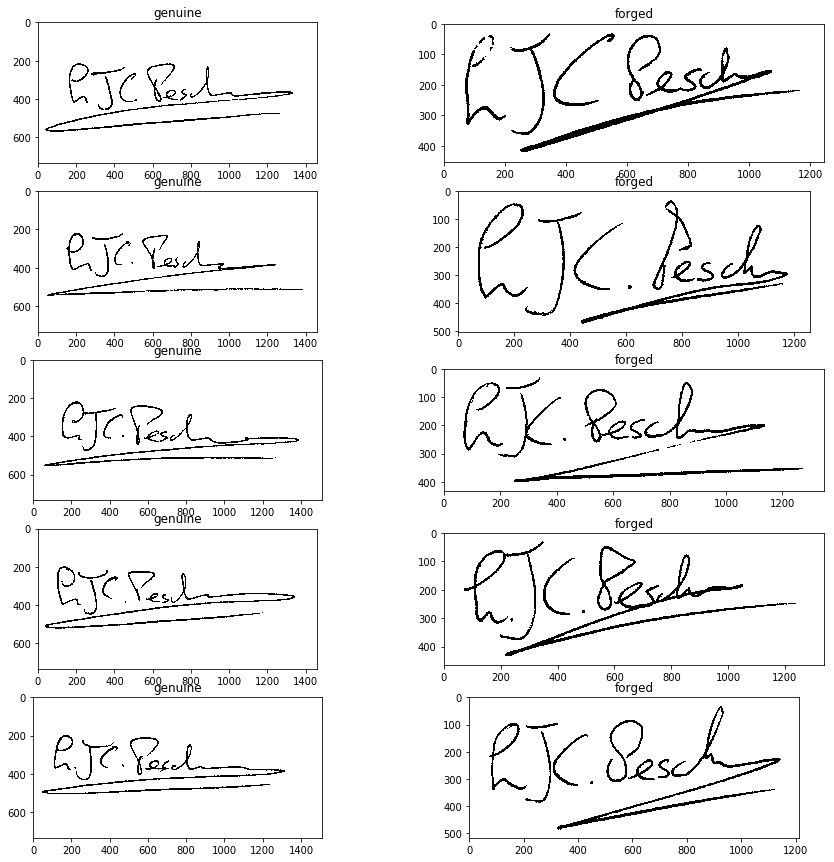

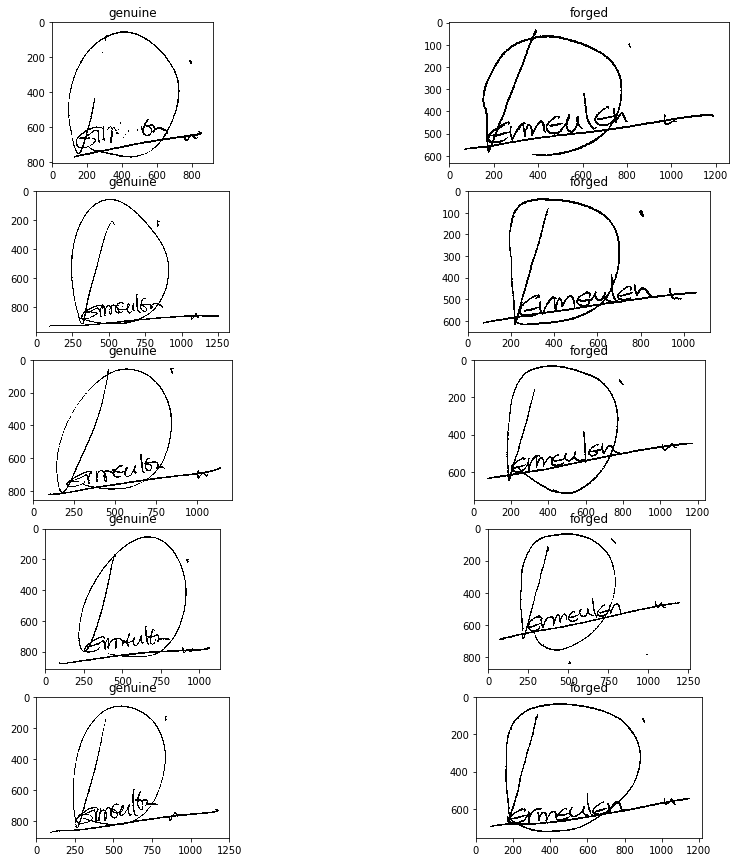

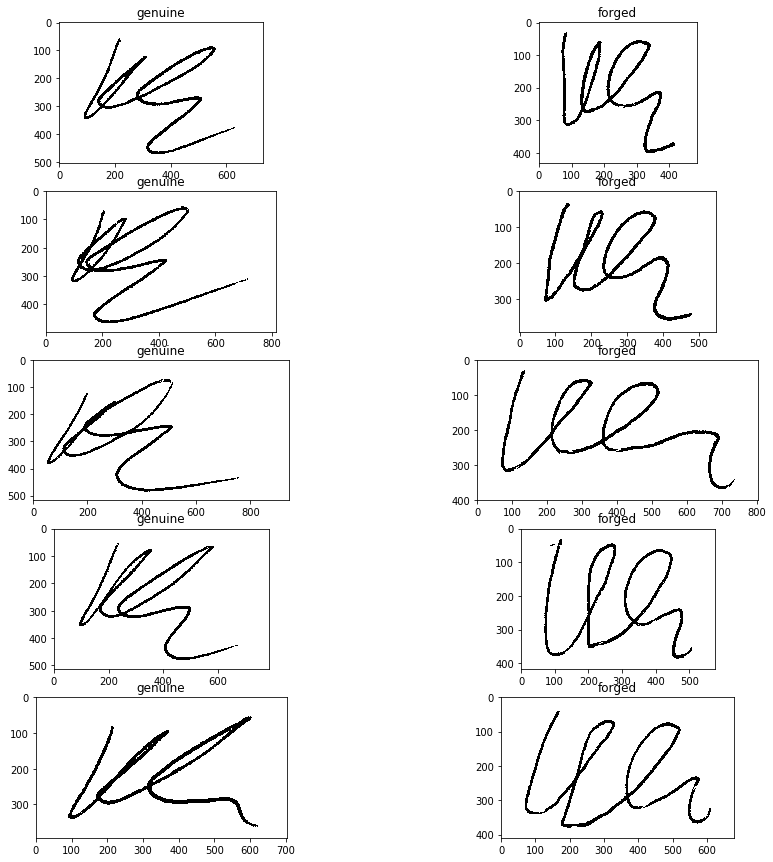

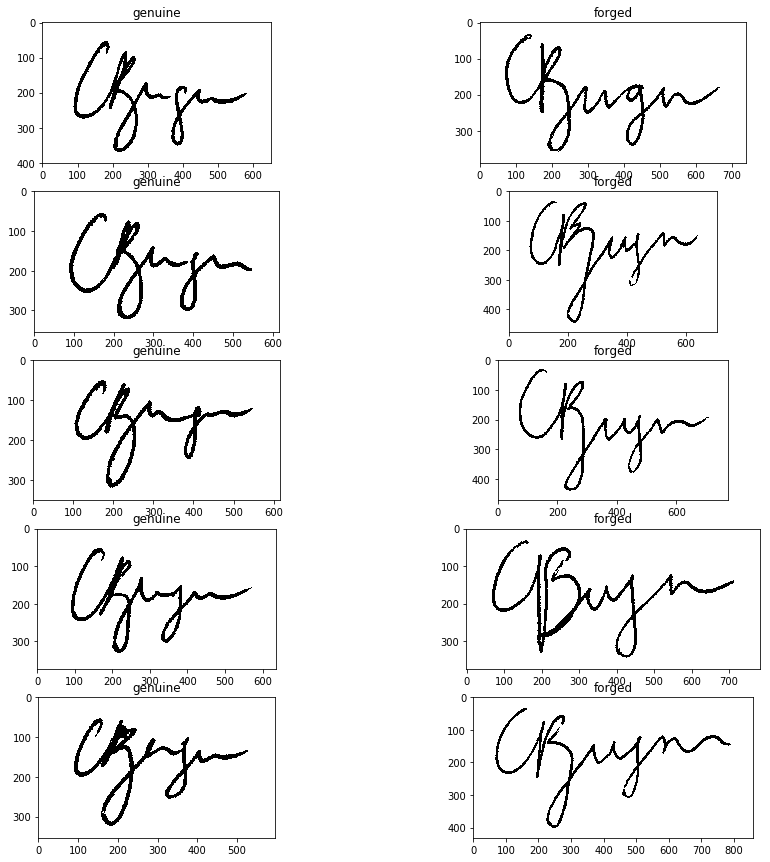

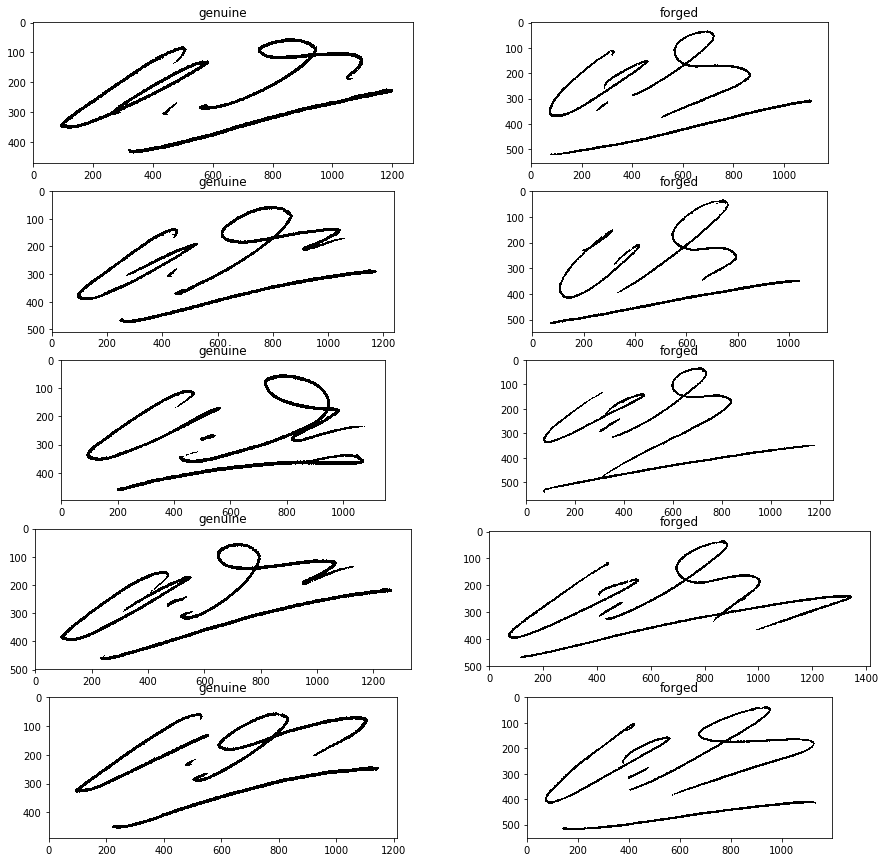

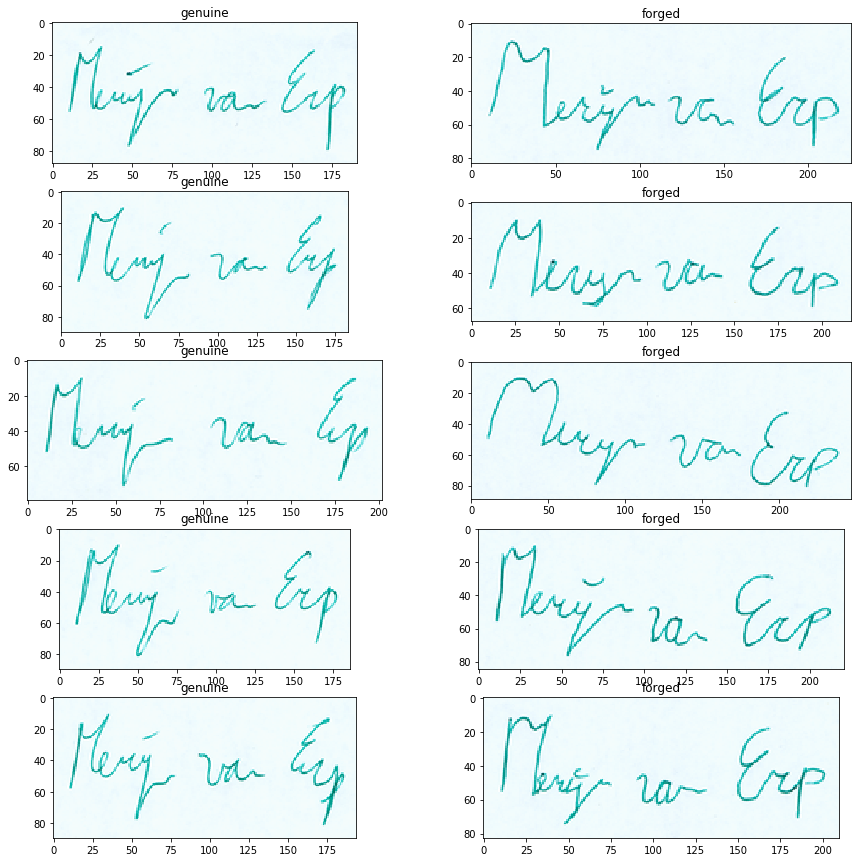

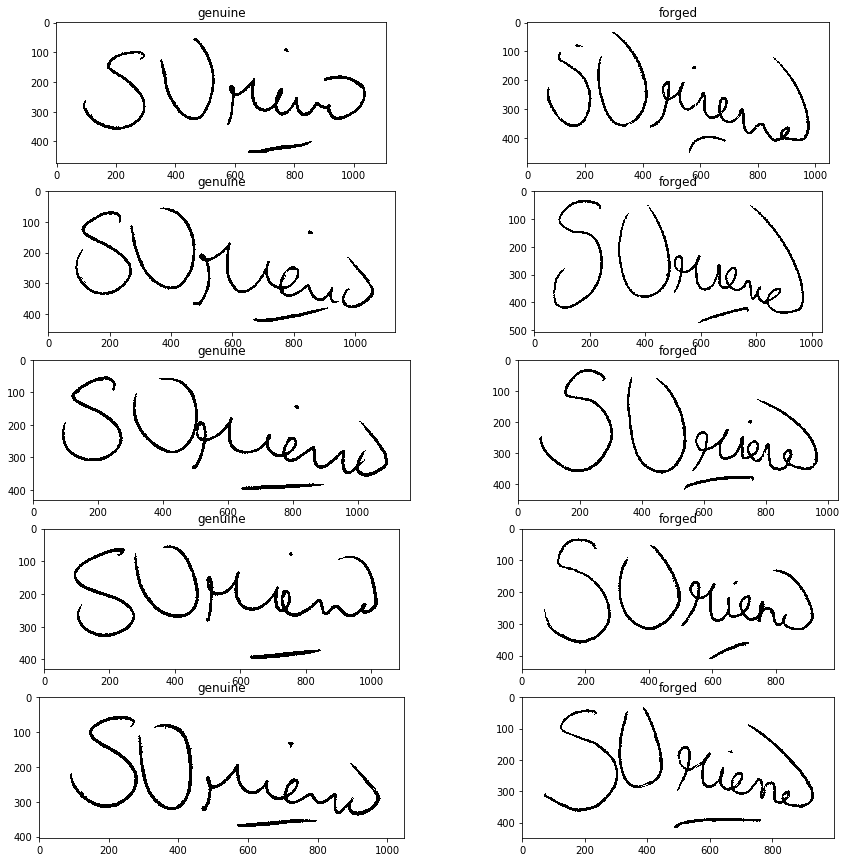

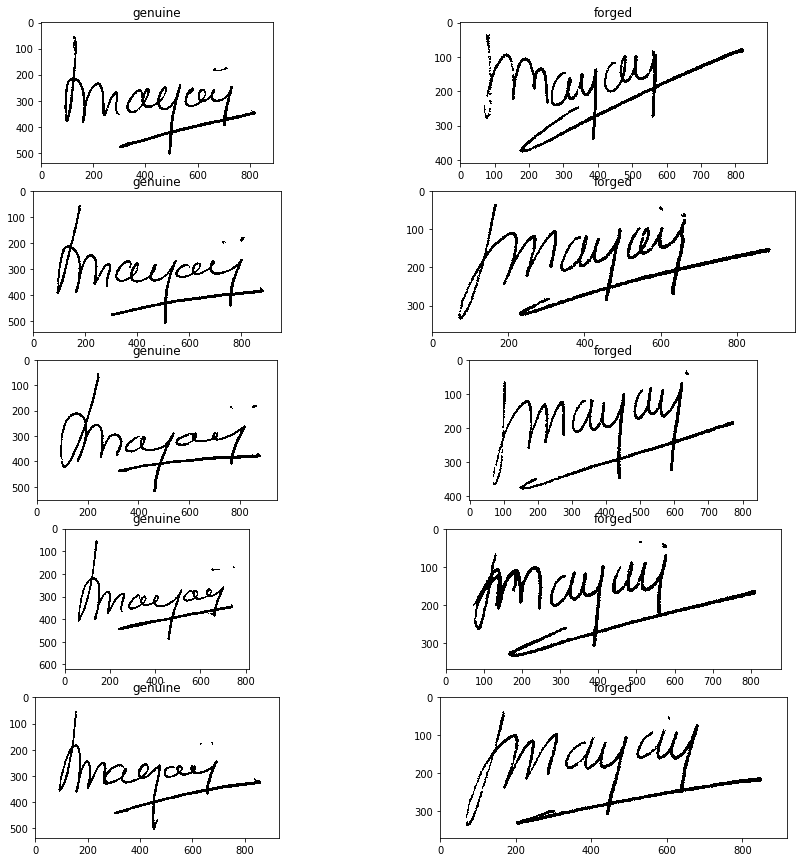

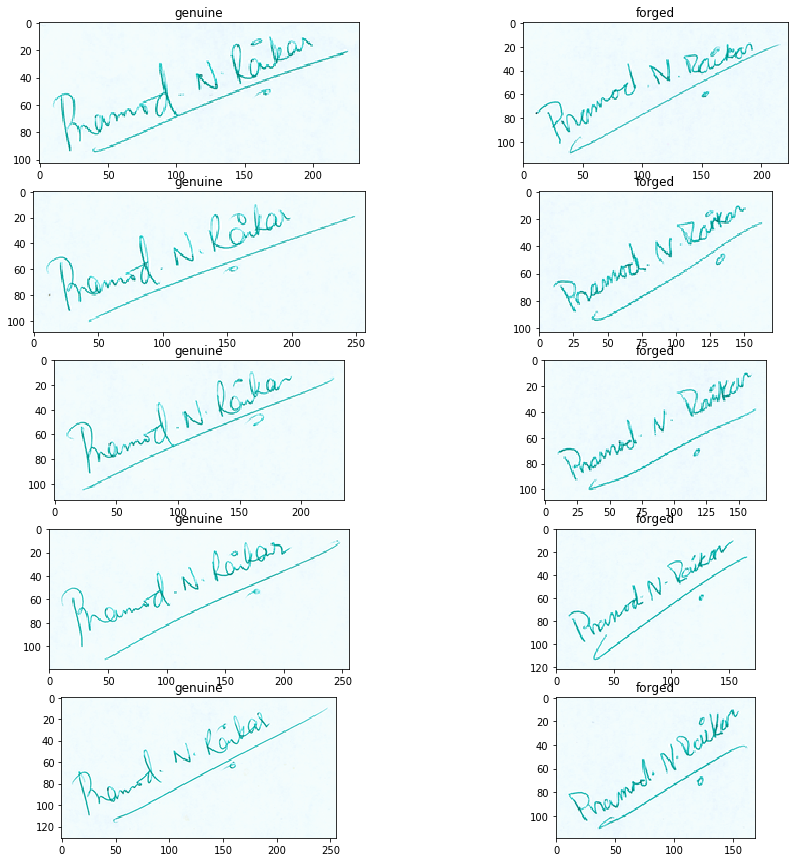

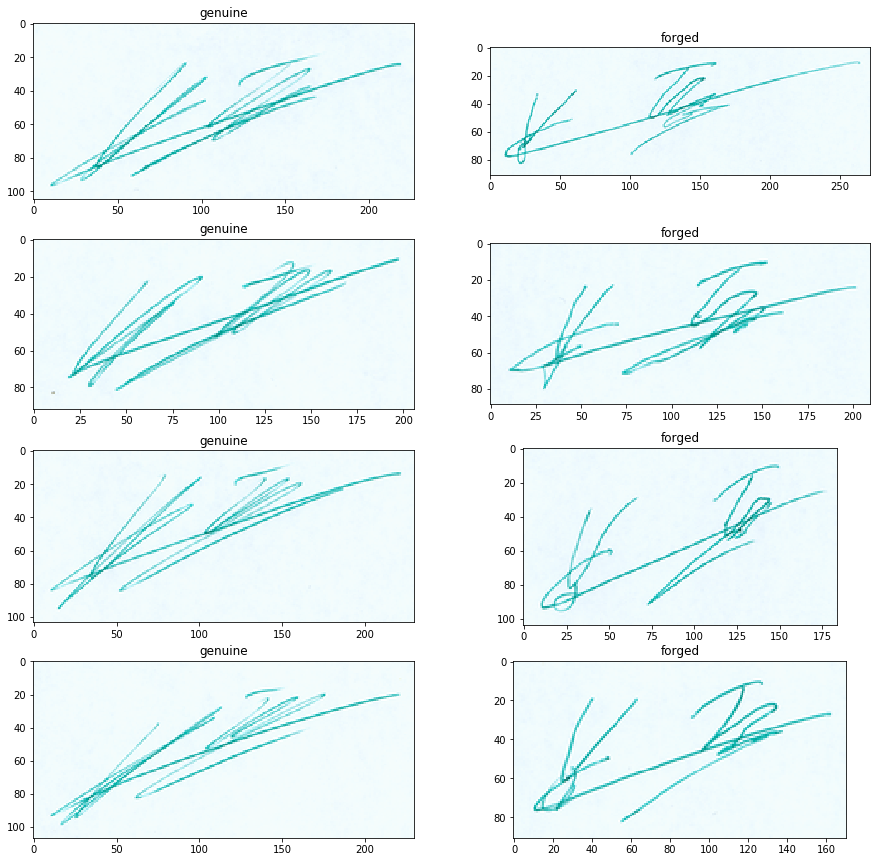

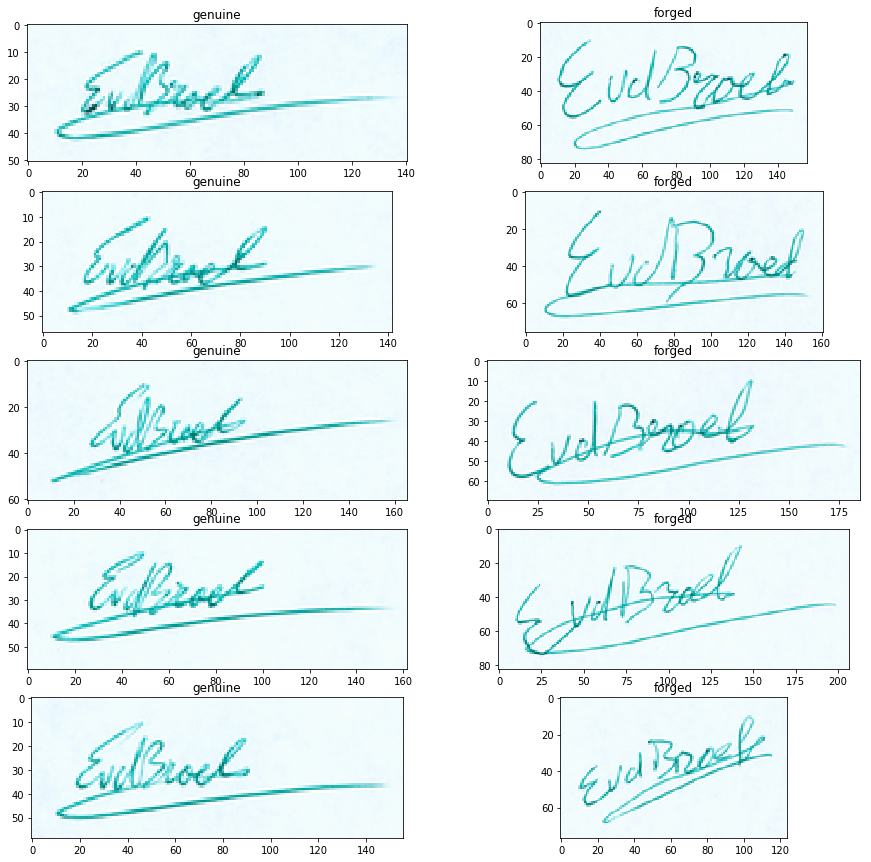

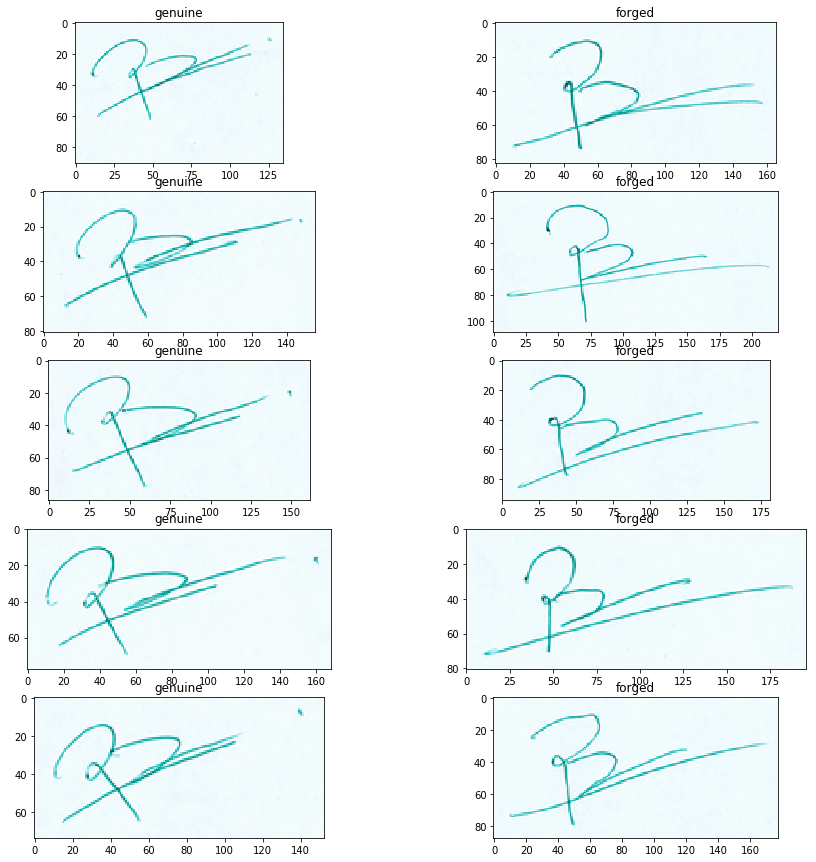

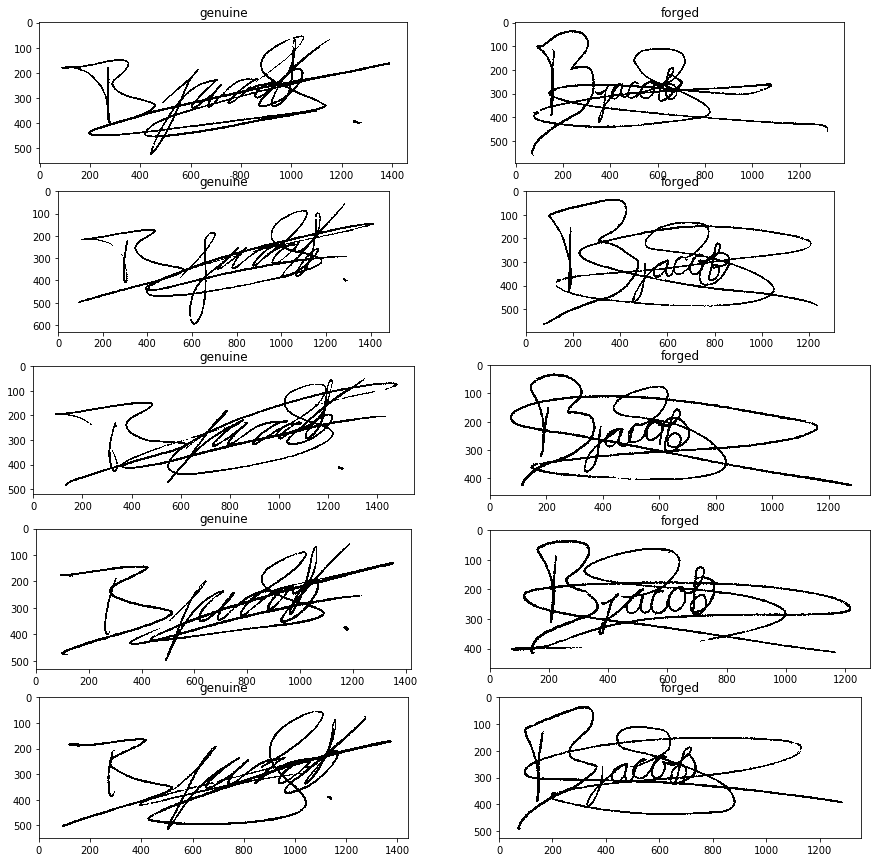

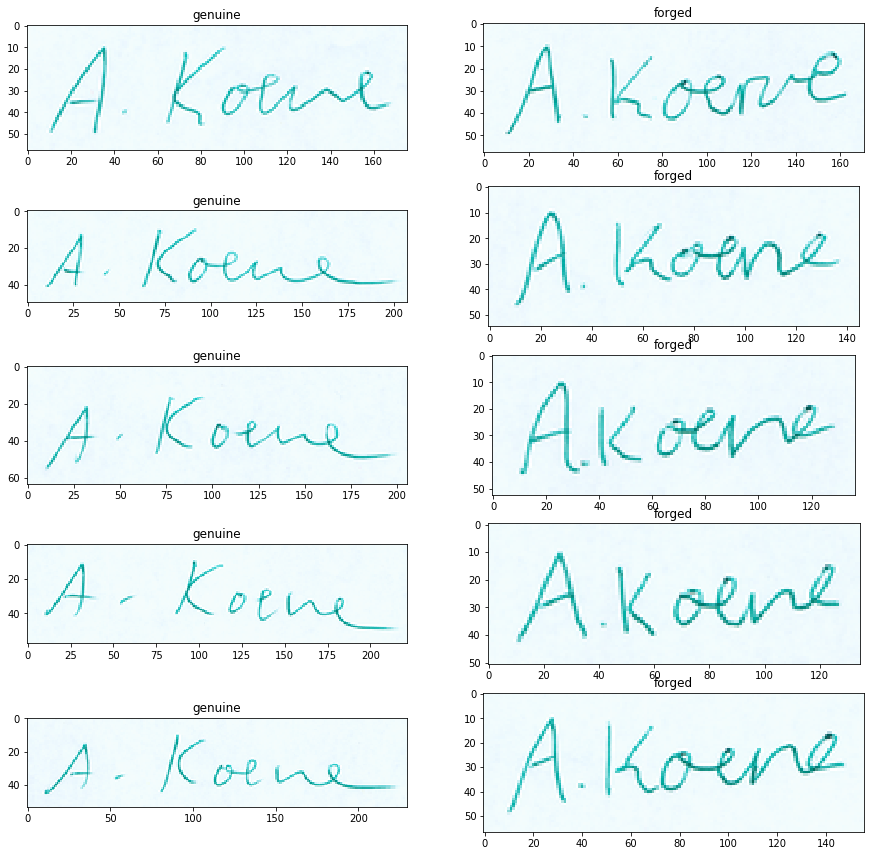

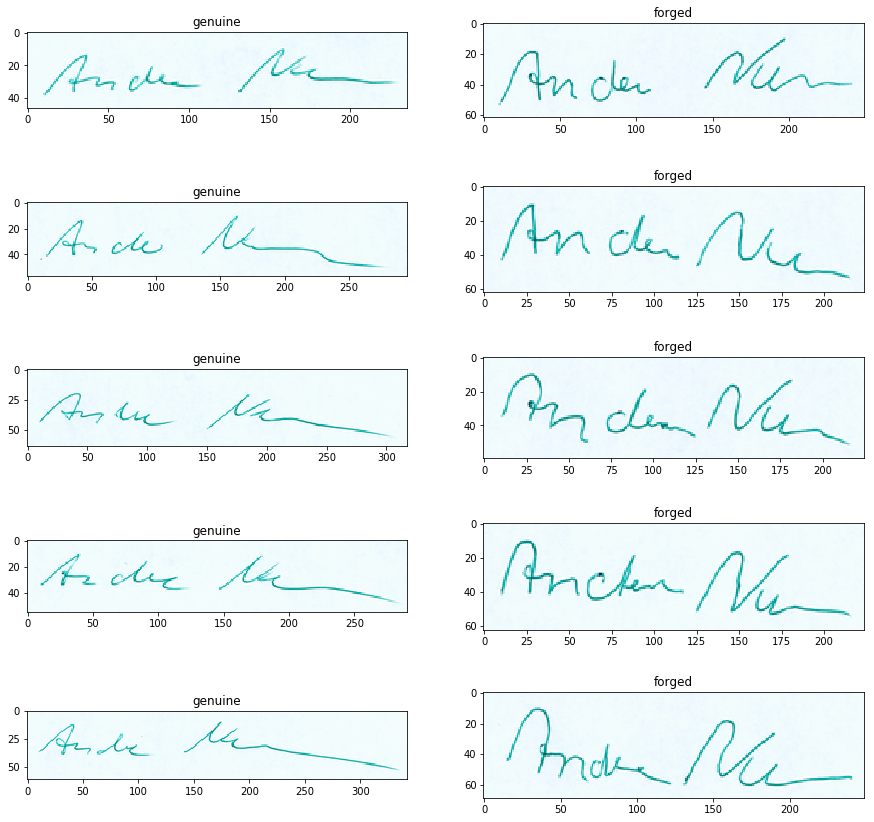

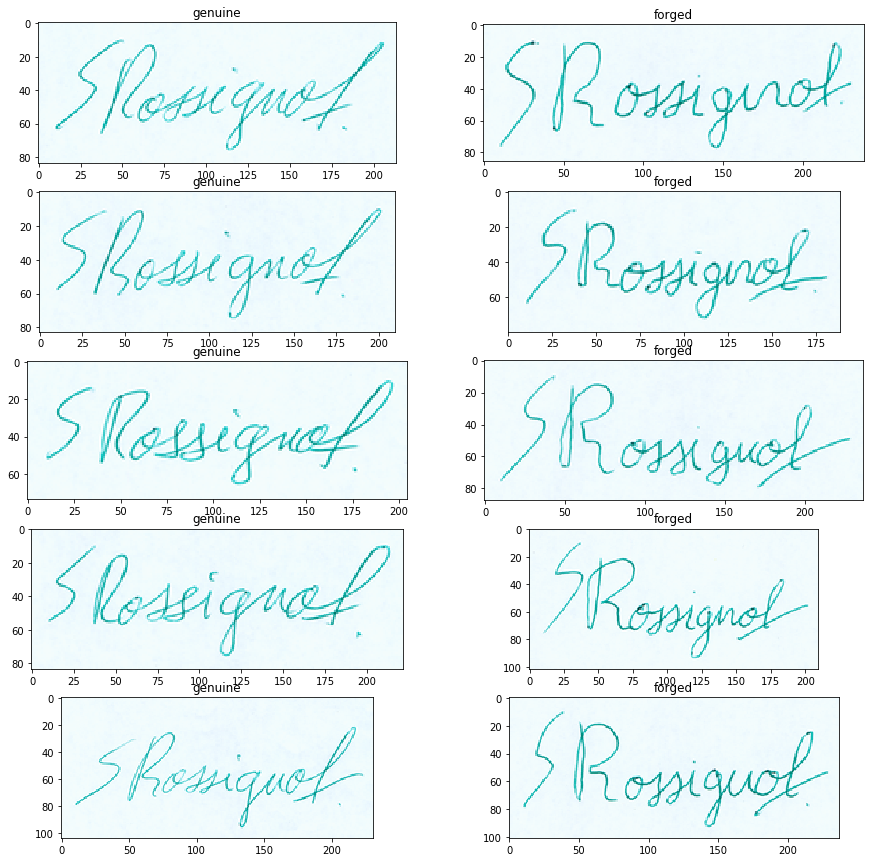

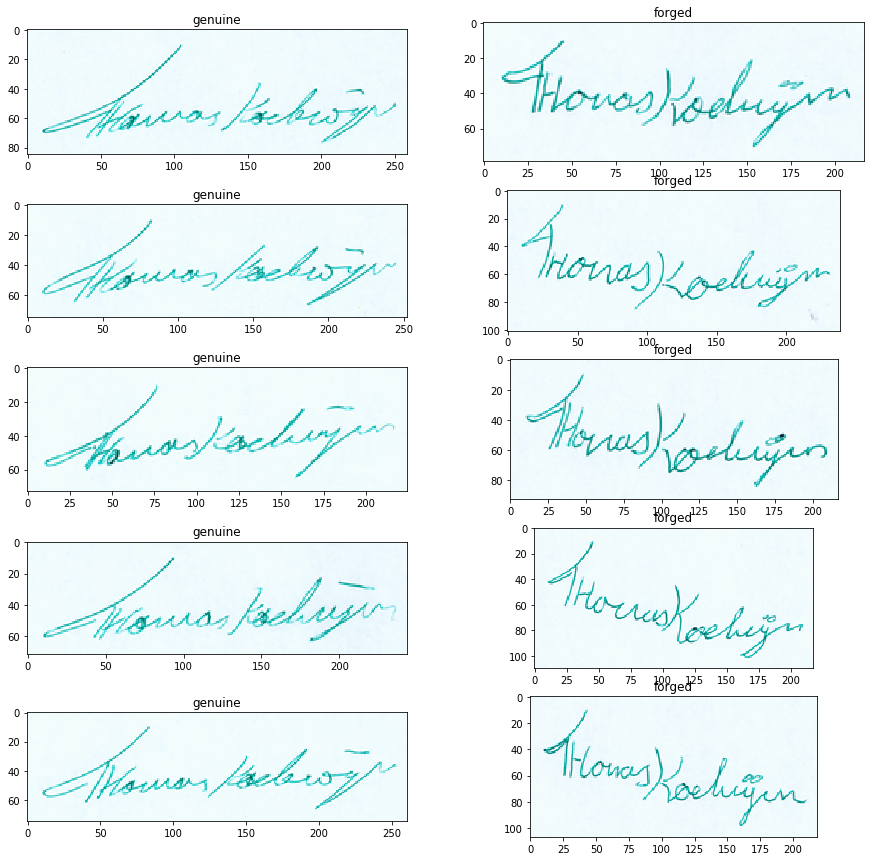

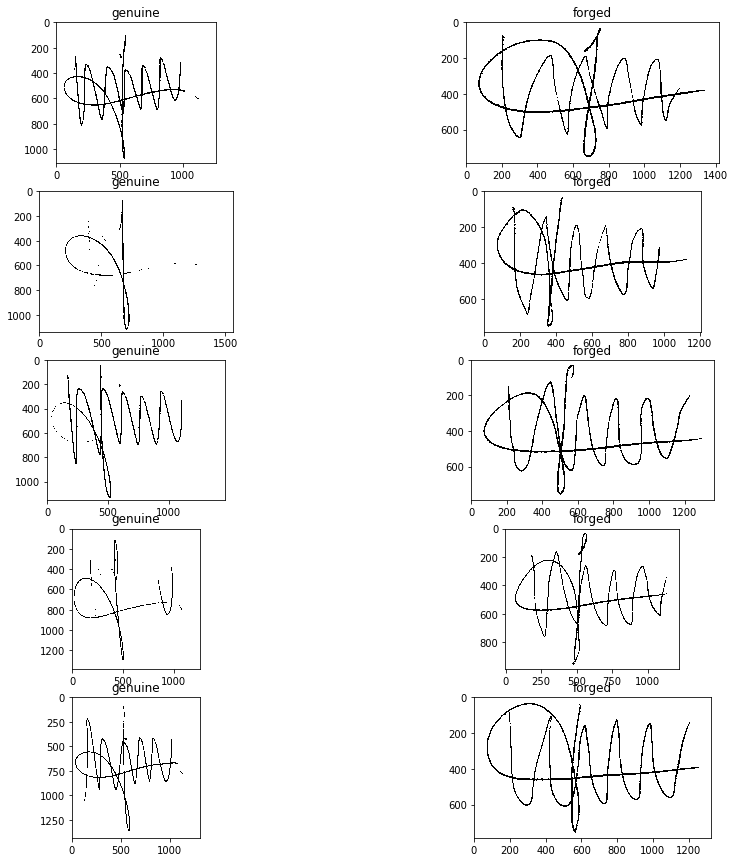

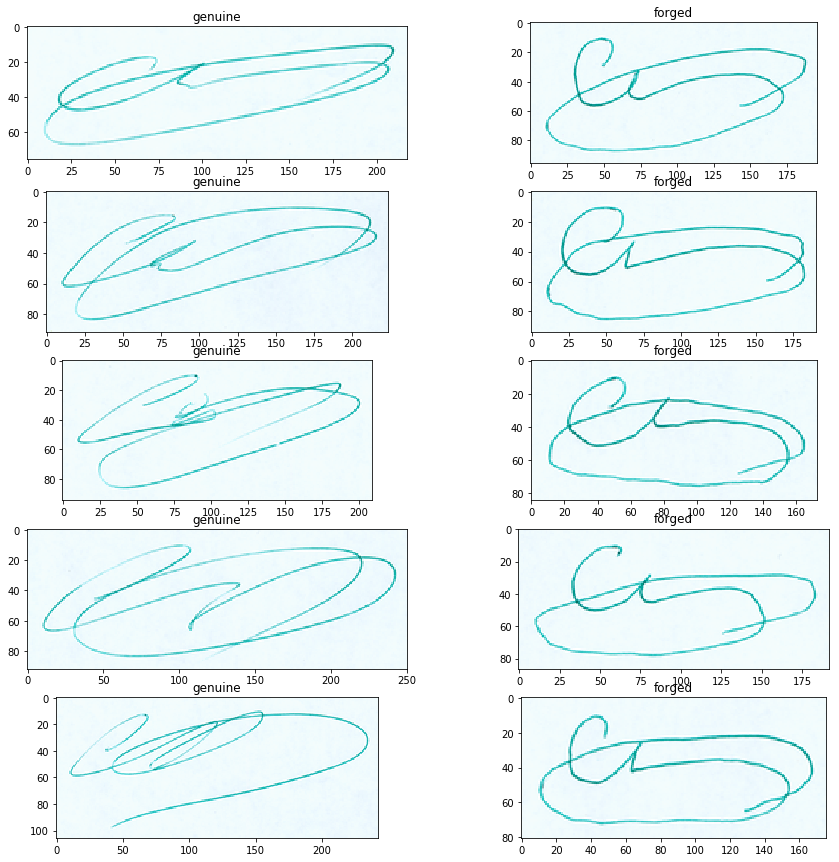

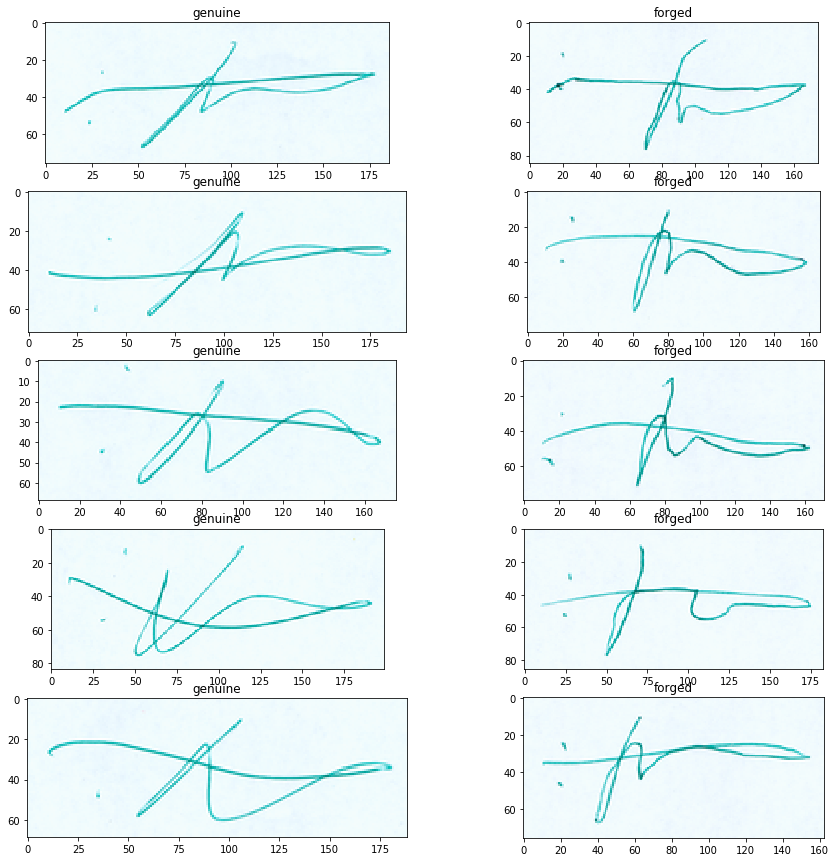

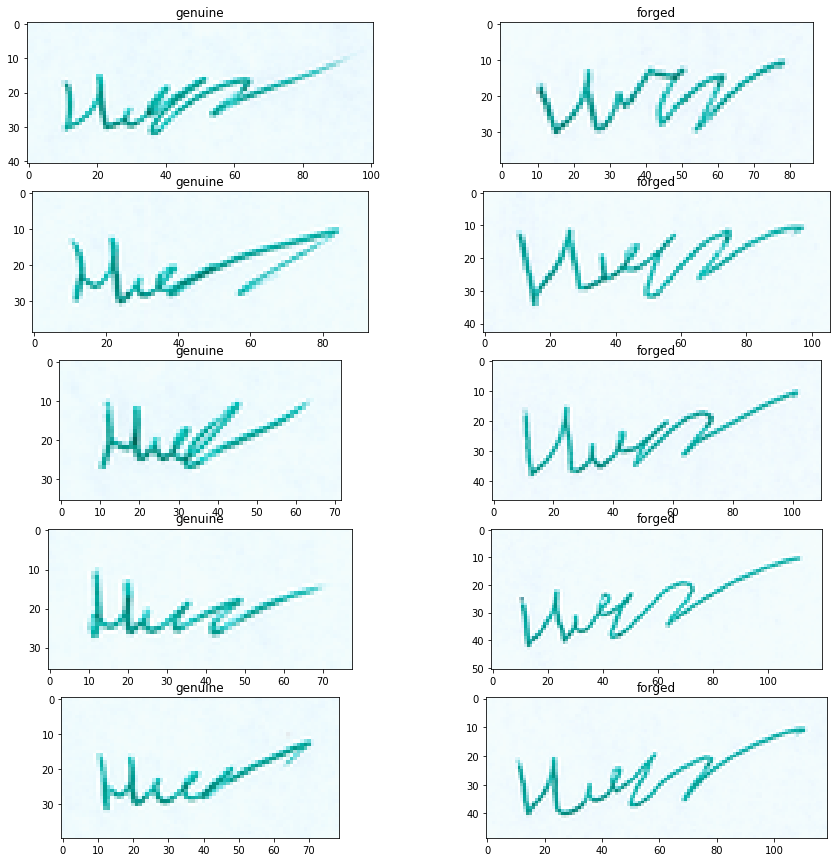

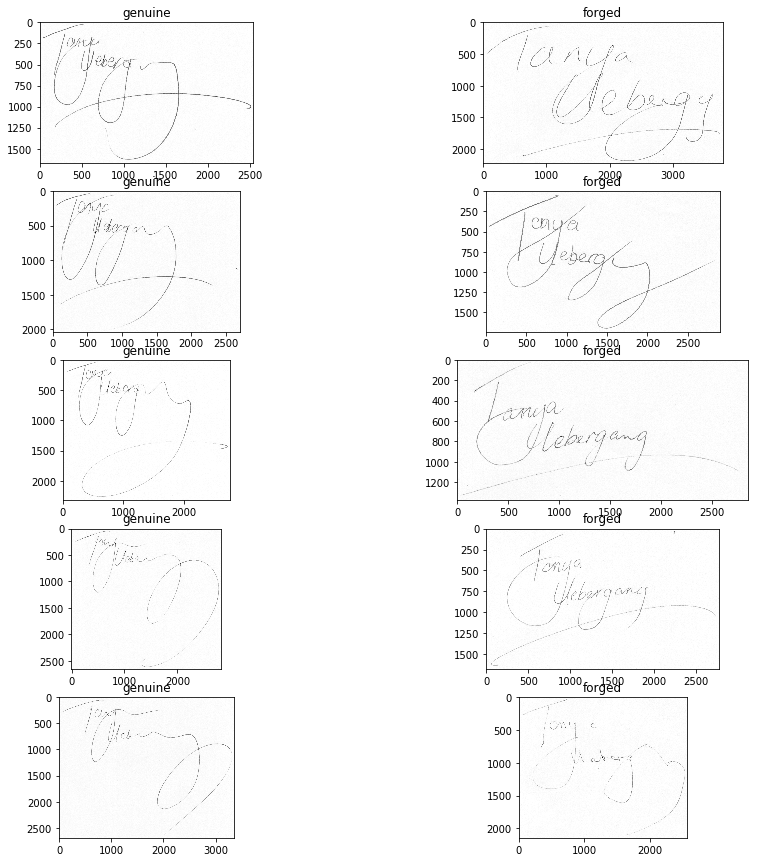

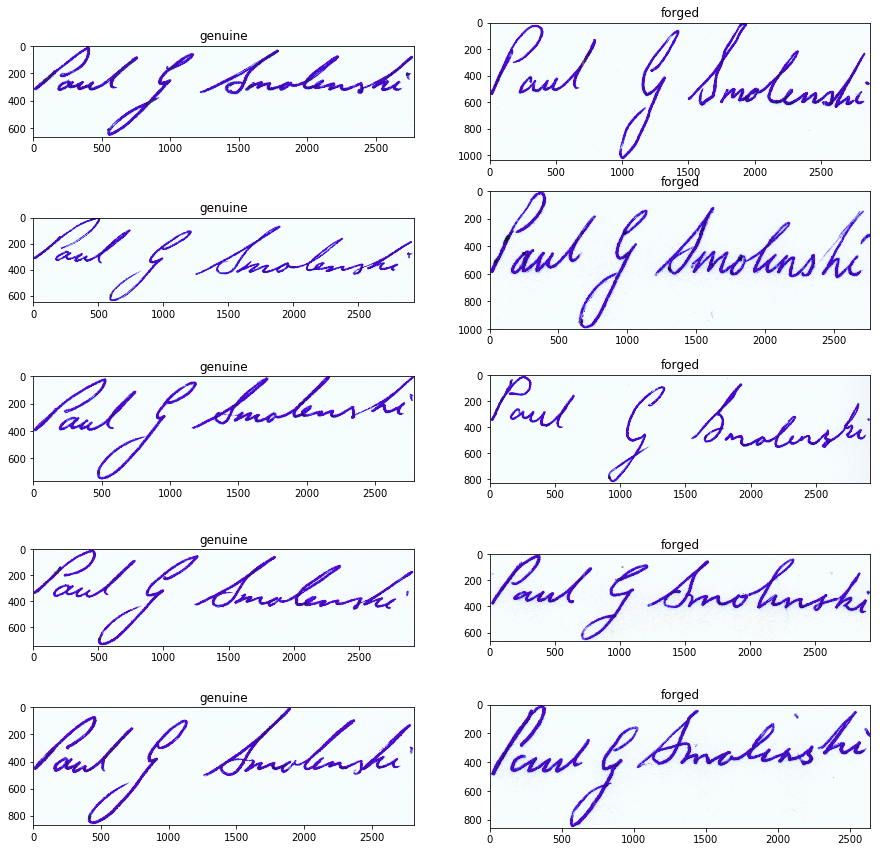

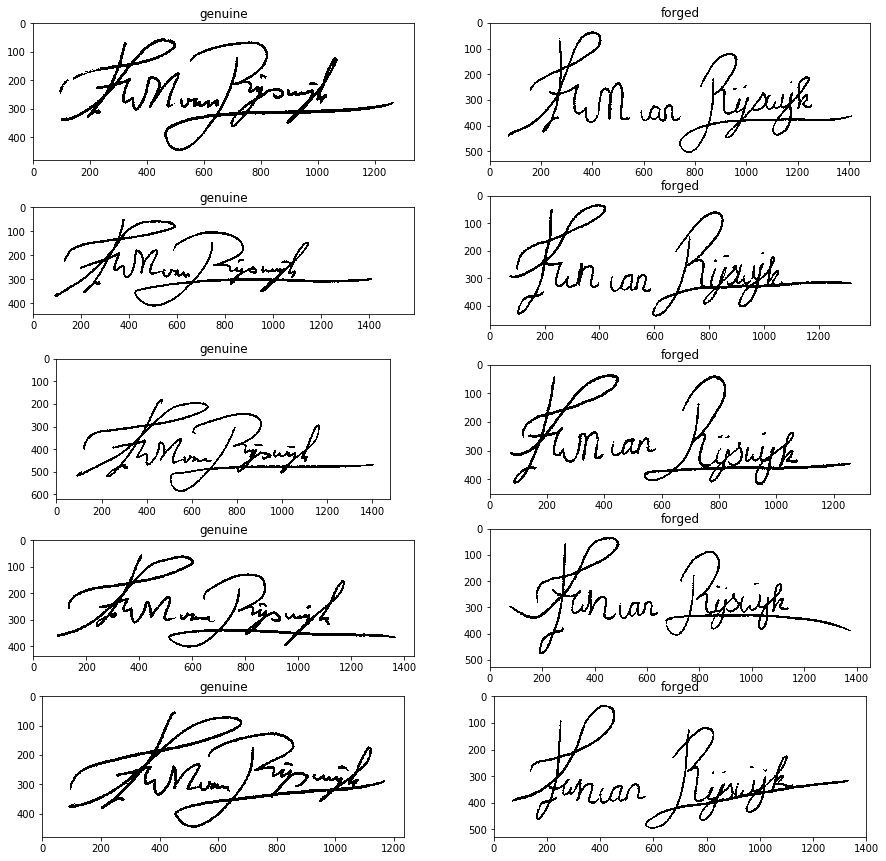

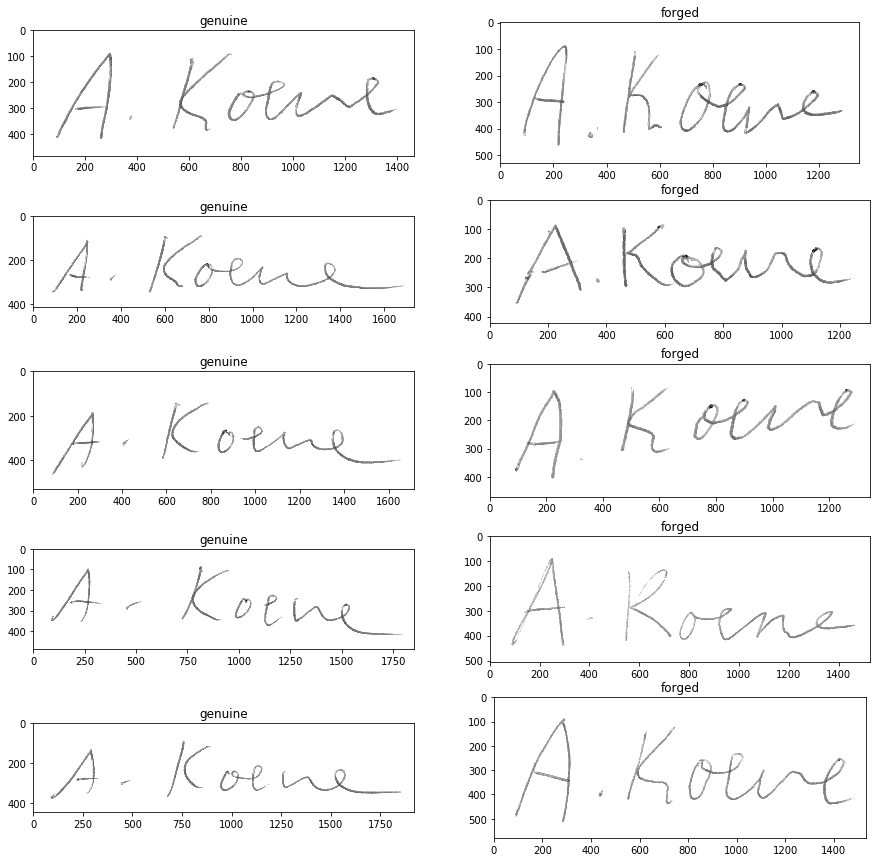

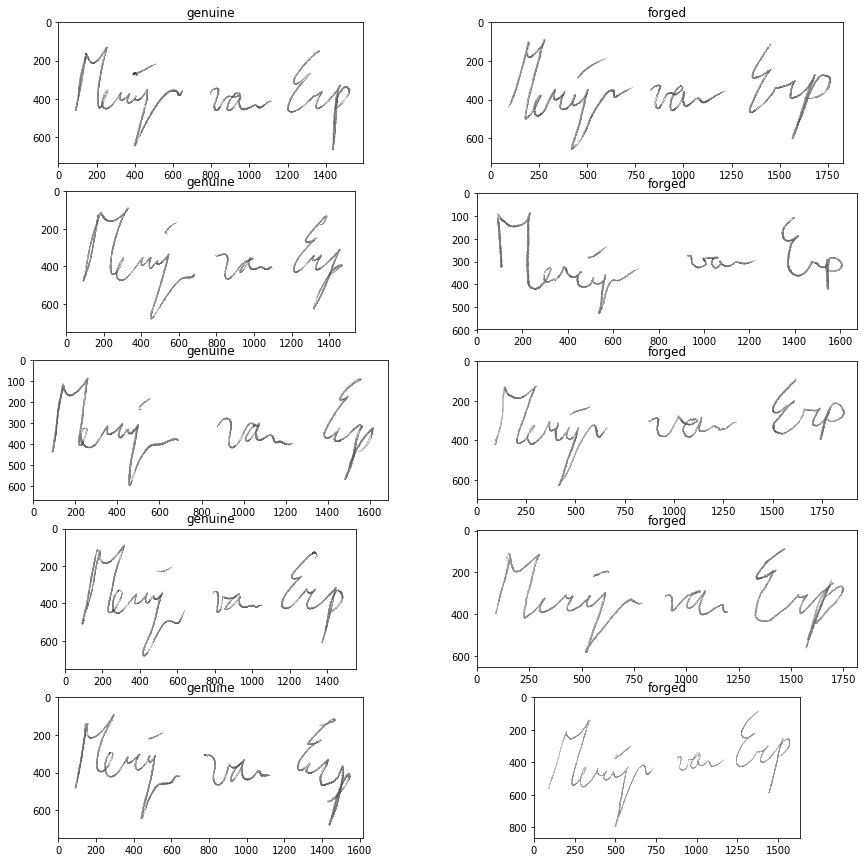

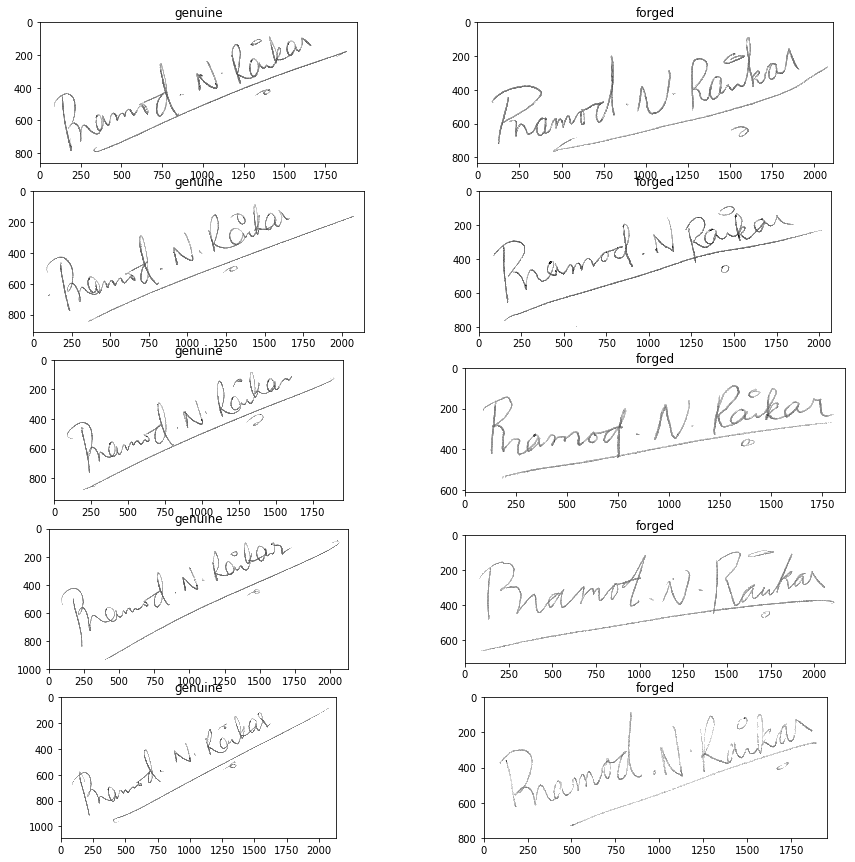

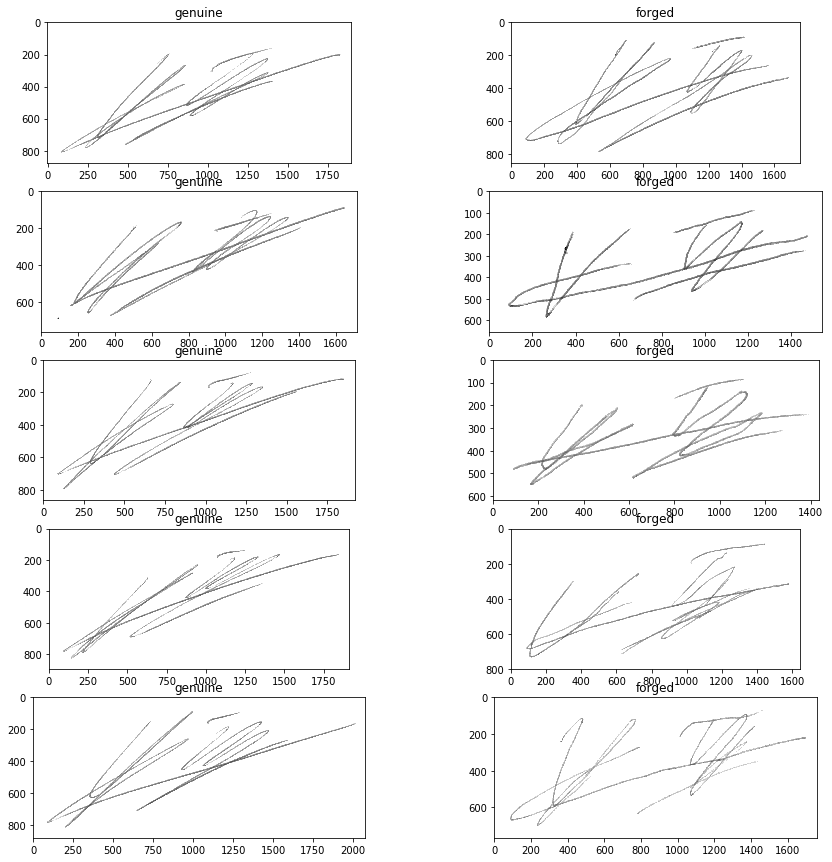

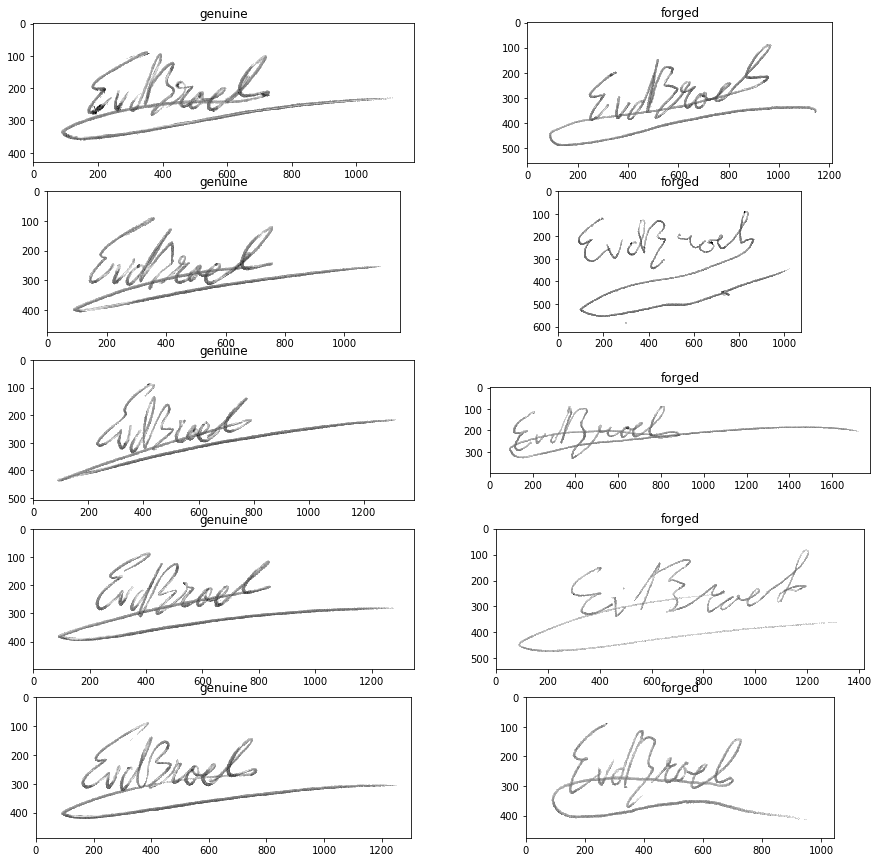

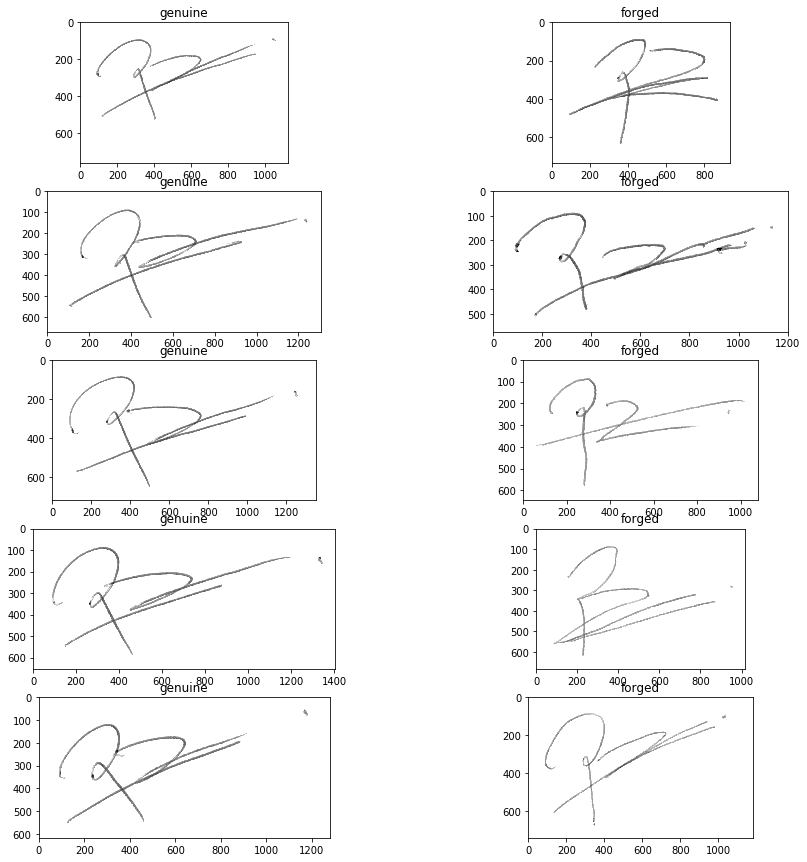

In [7]:
for idx in sample_signatures_df.index:
       
    genuine_signatures = sample_signatures_df.loc[ idx, 'GenuineSignature'].split(',')
    forged_signatures = sample_signatures_df.loc[ idx, 'ForgedSignature'].split(',')
    
    size = min( len(genuine_signatures), len(forged_signatures) )
    f, axarr = plt.subplots( nrows = size, ncols = 2, figsize=(15,15))
        
    for j in range( size ):
        
        sample_i = cv2.imread( genuine_signatures_path + genuine_signatures[j],  cv2.IMREAD_COLOR )
        sample_i = cv2.cvtColor( sample_i, cv2.COLOR_BGR2RGB )
        axarr[j, 0].imshow(sample_i )
        axarr[j, 0].title.set_text( 'genuine' )
        
        sample_j = cv2.imread( forged_signatures_path + forged_signatures[j], cv2.IMREAD_COLOR )
        sample_j = cv2.cvtColor( sample_j, cv2.COLOR_BGR2RGB )
        axarr[j, 1].imshow(sample_j )
        axarr[j, 1].title.set_text( 'forged' )

**SAMPLE IMAGES**

In [11]:
genuine_sign_sample_x_name = sample_signatures_df.GenuineSignature[2].split(',')[0] # genuine signature
genuine_sign_sample_y_name = sample_signatures_df.GenuineSignature[2].split(',')[1] # genuine signature
forged_sign_sample_name = sample_signatures_df.ForgedSignature[2].split(',')[1]  # forged signature

print( 'Image names:', genuine_sign_sample_x_name, genuine_sign_sample_y_name, forged_sign_sample_name )

Image names: NFI-00301003.png NFI-00302003.png NFI-00402003.png


**Reading samples images as gray scale images**

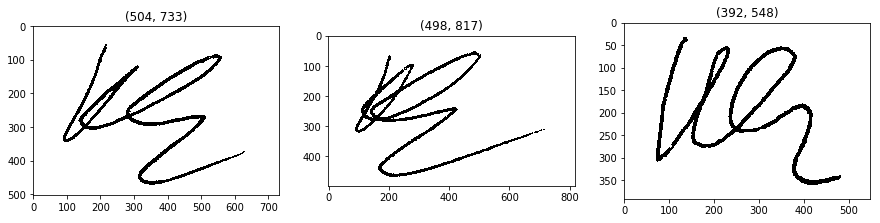

In [12]:
genuine_sign_sample_x = cv2.imread( genuine_signatures_path + genuine_sign_sample_x_name, cv2.IMREAD_GRAYSCALE )
genuine_sign_sample_y = cv2.imread( genuine_signatures_path + genuine_sign_sample_y_name, cv2.IMREAD_GRAYSCALE )
forged_sign_sample = cv2.imread( forged_signatures_path + forged_sign_sample_name, cv2.IMREAD_GRAYSCALE )

f, axarr = plt.subplots(1,3, figsize=(15,15) )

axarr[0].imshow(genuine_sign_sample_x, cmap = plt.cm.gray )
axarr[0].title.set_text( genuine_sign_sample_x.shape )

axarr[1].imshow(genuine_sign_sample_y, cmap = plt.cm.gray )
axarr[1].title.set_text( genuine_sign_sample_y.shape )

axarr[2].imshow(forged_sign_sample, cmap = plt.cm.gray )
axarr[2].title.set_text( forged_sign_sample.shape )

In [13]:
genuine_sign_sample_x

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

**Binarizing images and visualizing results**

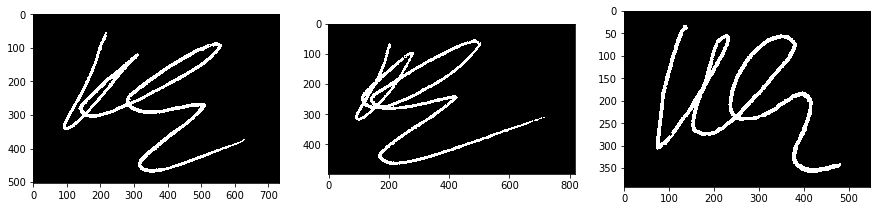

In [14]:
# Otsu's thresholding
a, genuine_sign_sample_x_bin = cv2.threshold( genuine_sign_sample_x, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
a, genuine_sign_sample_y_bin = cv2.threshold( genuine_sign_sample_y, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
a, forged_sign_sample_bin = cv2.threshold( forged_sign_sample, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )

f, axarr = plt.subplots(1,3, figsize=(15,15))
axarr[0].imshow(genuine_sign_sample_x_bin, cmap = plt.cm.binary_r)
axarr[1].imshow(genuine_sign_sample_y_bin, cmap = plt.cm.binary_r)
axarr[2].imshow(forged_sign_sample_bin, cmap = plt.cm.binary_r)

In [15]:
genuine_sign_sample_x_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**Computing signature boundingbox**

In [16]:
drawing = genuine_sign_sample_x_bin.copy()

points = cv2.findNonZero( drawing )
x, y, w, h = cv2.boundingRect( points )
print( x, y, w, h )

89 57 541 416


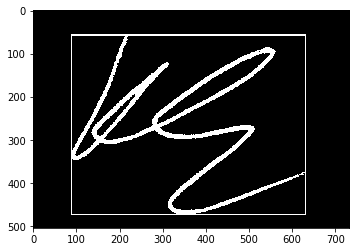

In [17]:
drawing = cv2.rectangle(drawing, (x, y), (x+w, y+h), (255, 255, 255), 2)

plt.imshow( drawing, cmap = plt.cm.binary_r )

**Croping image according boundingbox**

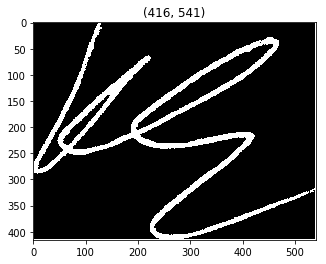

In [18]:
crop_img = drawing[y:y+h, x:x+w]

plt.title( crop_img.shape )
plt.imshow( crop_img, cmap = plt.cm.binary_r )

### Defining method for processing images

In [19]:
def processing_image( image_path ):
    
    # Read image as grayscale
    image = cv2.imread( image_path, cv2.IMREAD_GRAYSCALE )
    
    # Binarize image through Otsu's thresholding. 
    # Background will be back and signature will be white.
    _, image_bin = cv2.threshold( image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
    
    # Compute signature bounding box
    points = cv2.findNonZero( image_bin )
    x, y, w, h = cv2.boundingRect( points )
    
    # Crop image according to boundingbox
    proc_image = image_bin[y:y+h, x:x+w]
    
    return proc_image

In [20]:
proc_image_x = processing_image(genuine_signatures_path + genuine_sign_sample_x_name )
proc_image_y = processing_image(genuine_signatures_path + genuine_sign_sample_y_name )
proc_image = processing_image(forged_signatures_path + forged_sign_sample_name )

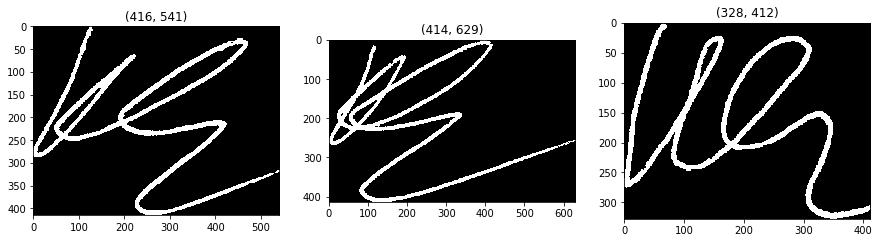

In [21]:
f, axarr = plt.subplots(1,3, figsize=(15,15) )

axarr[0].imshow(proc_image_x, cmap = plt.cm.binary_r )
axarr[0].title.set_text( proc_image_x.shape )

axarr[1].imshow(proc_image_y, cmap = plt.cm.binary_r )
axarr[1].title.set_text( proc_image_y.shape )

axarr[2].imshow(proc_image, cmap = plt.cm.binary_r )
axarr[2].title.set_text( proc_image.shape )

**Resizing key image according to other image**

In [22]:
new_h, new_w = proc_image.shape[:2]
print( new_h, new_w )
key_image = cv2.resize( proc_image_x, (new_w, new_h) )

328 412


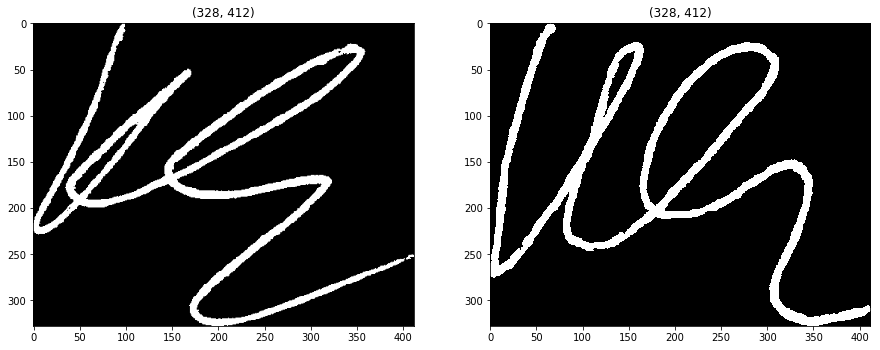

In [23]:
f, axarr = plt.subplots(1,2, figsize=(15,15) )

axarr[0].imshow(key_image, cmap = plt.cm.gray )
axarr[0].title.set_text( key_image.shape )

axarr[1].imshow(proc_image, cmap = plt.cm.gray )
axarr[1].title.set_text( proc_image.shape )


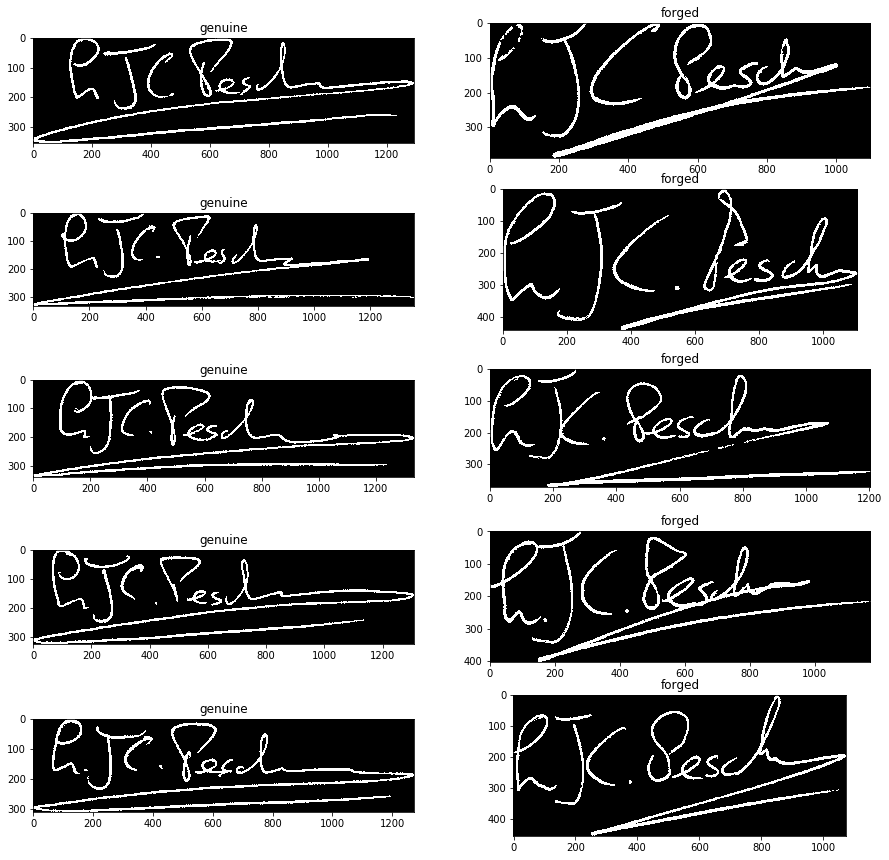

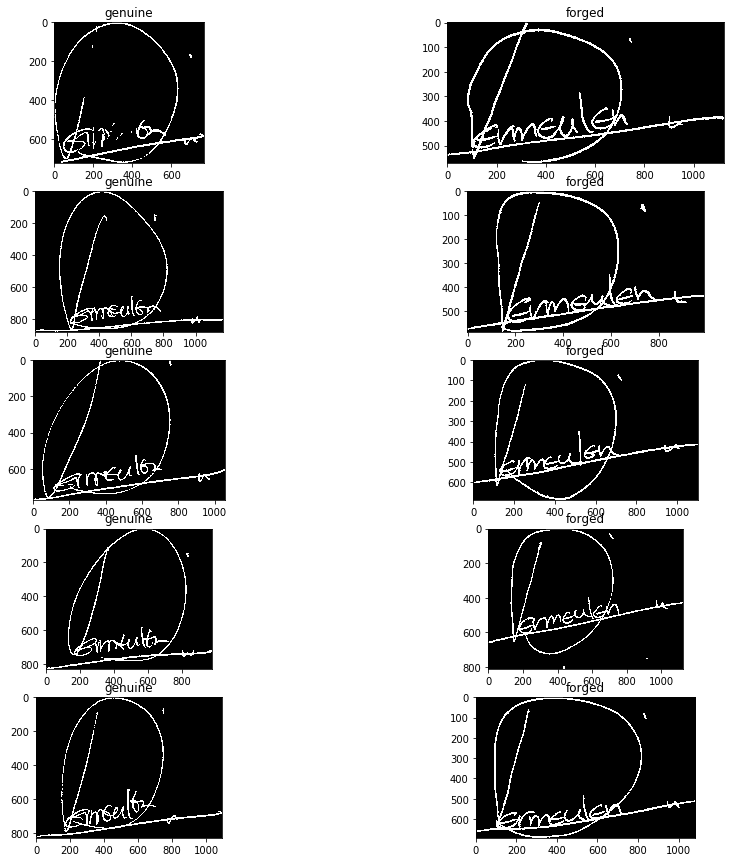

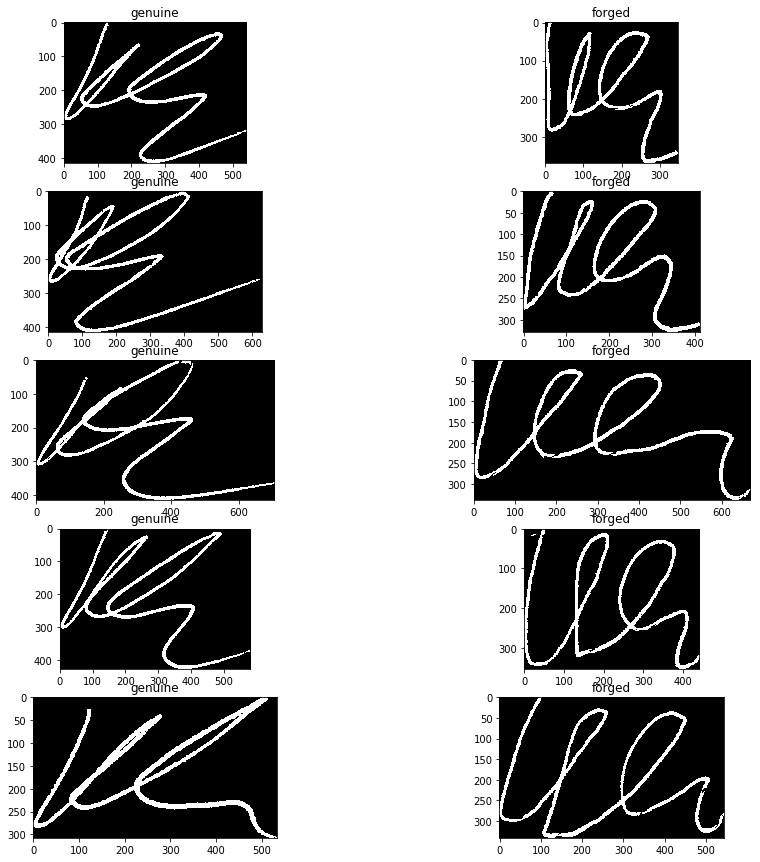

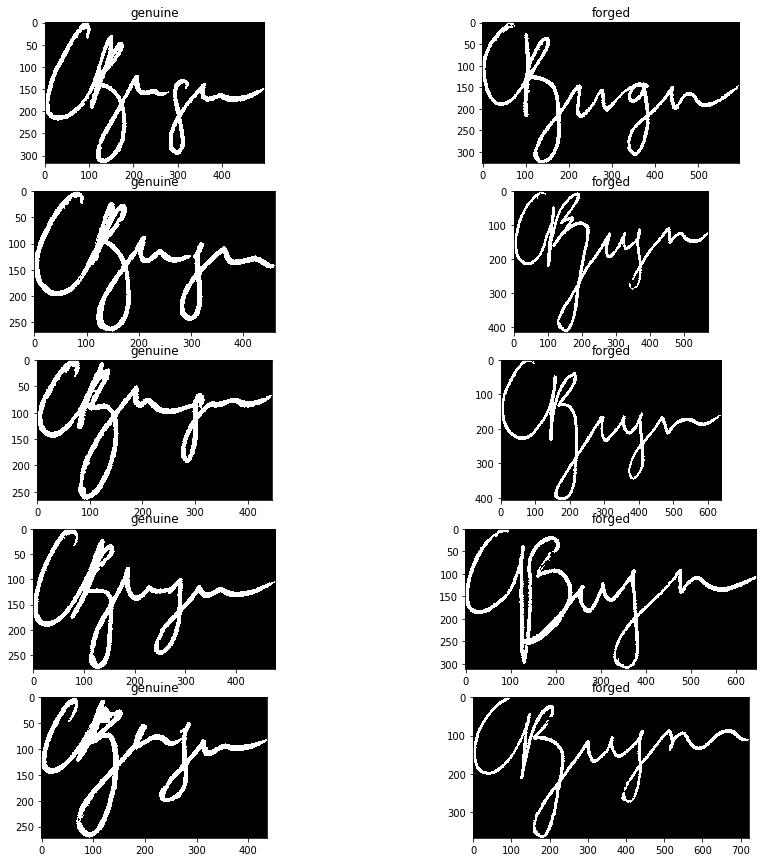

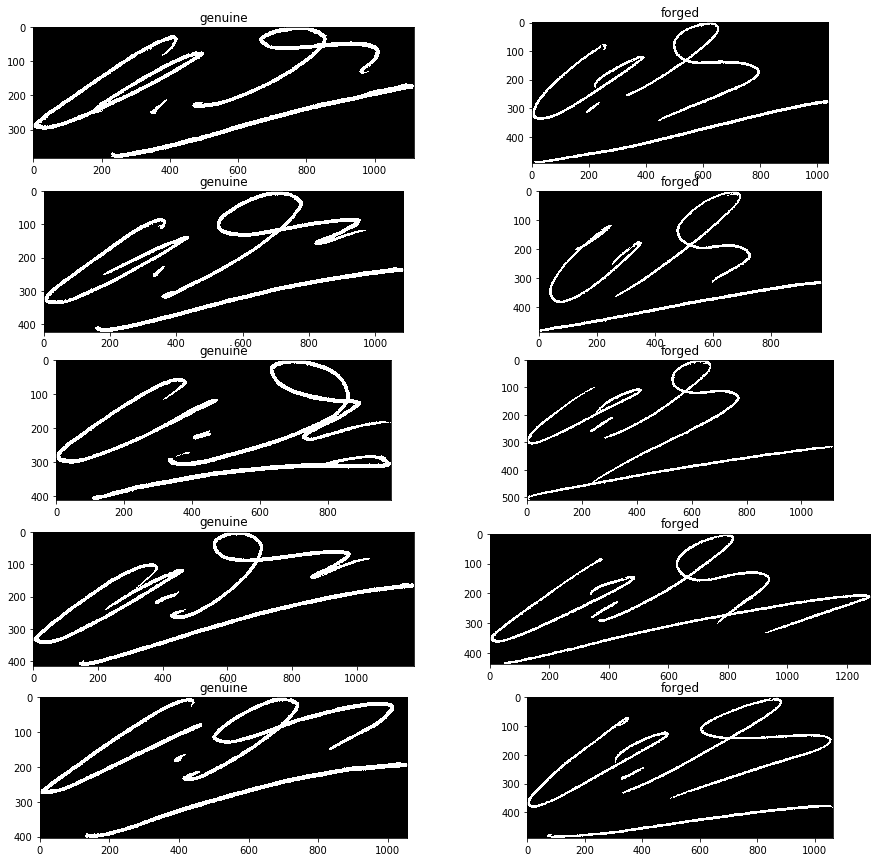

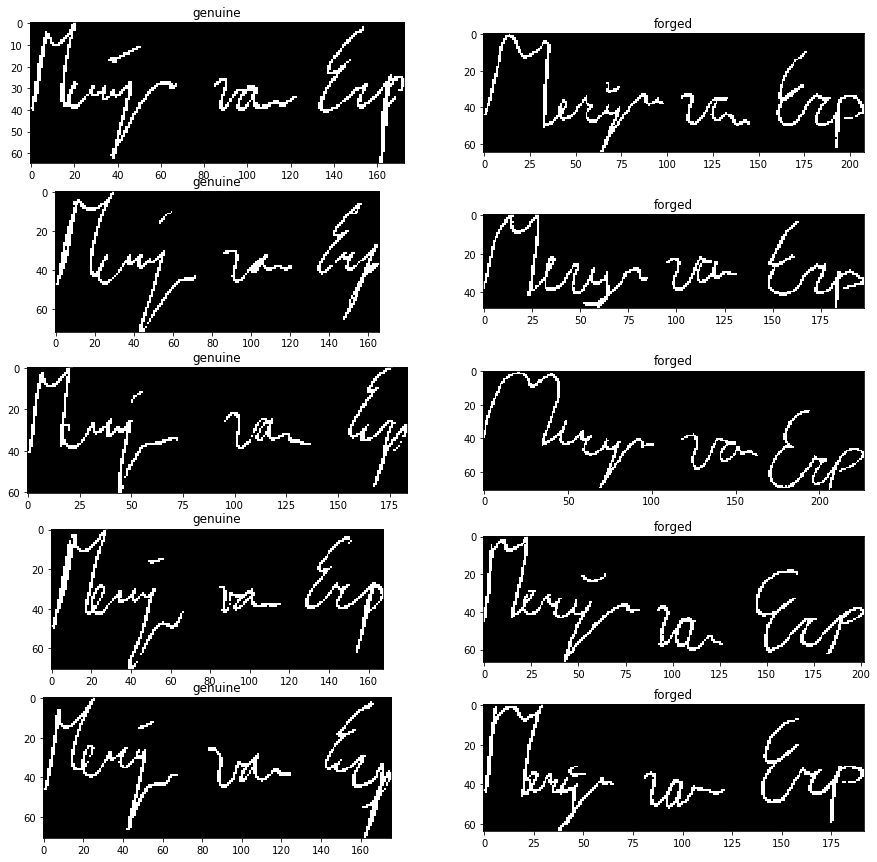

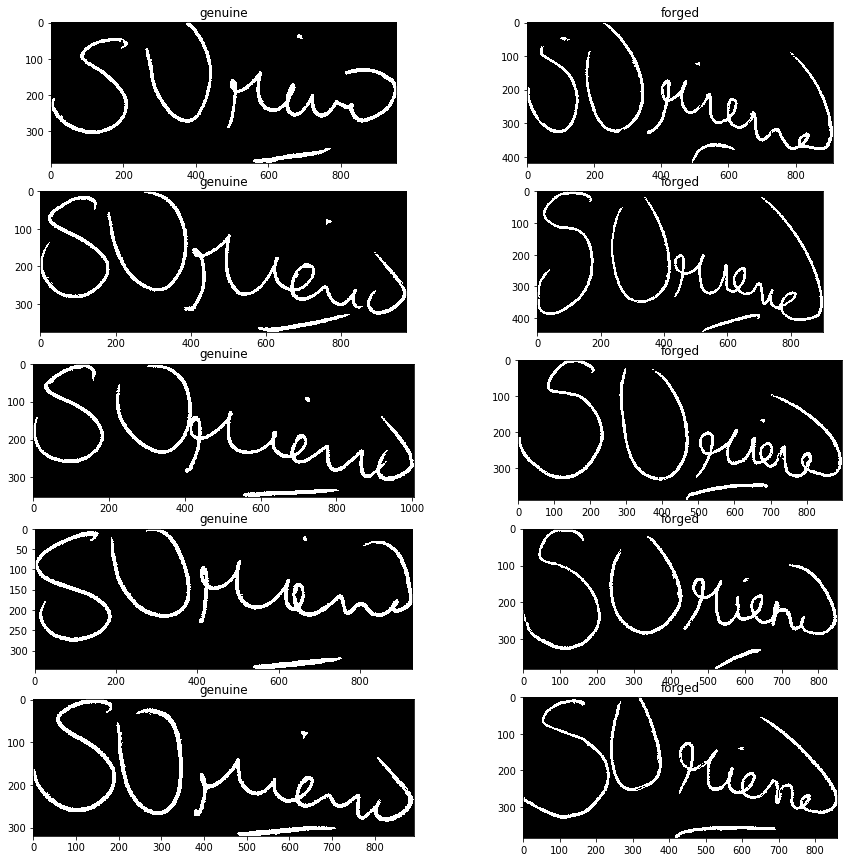

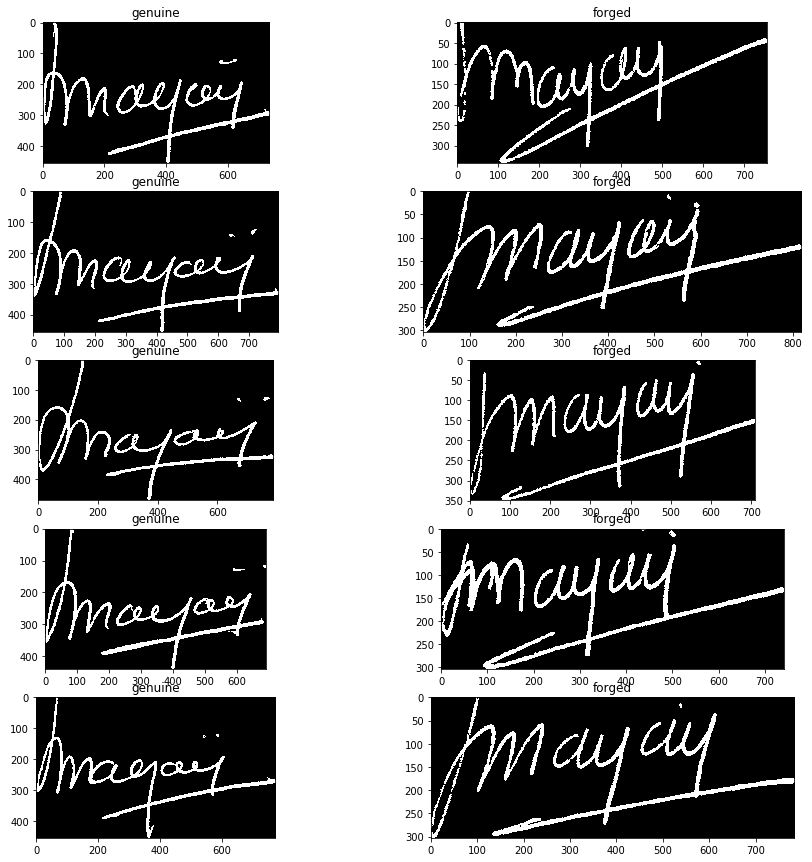

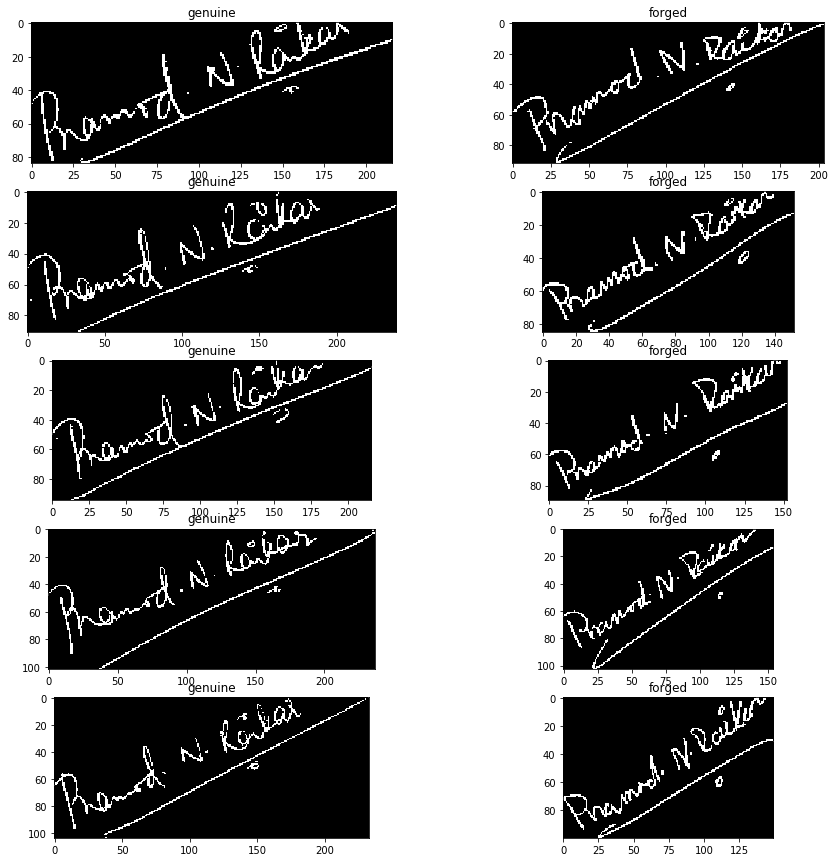

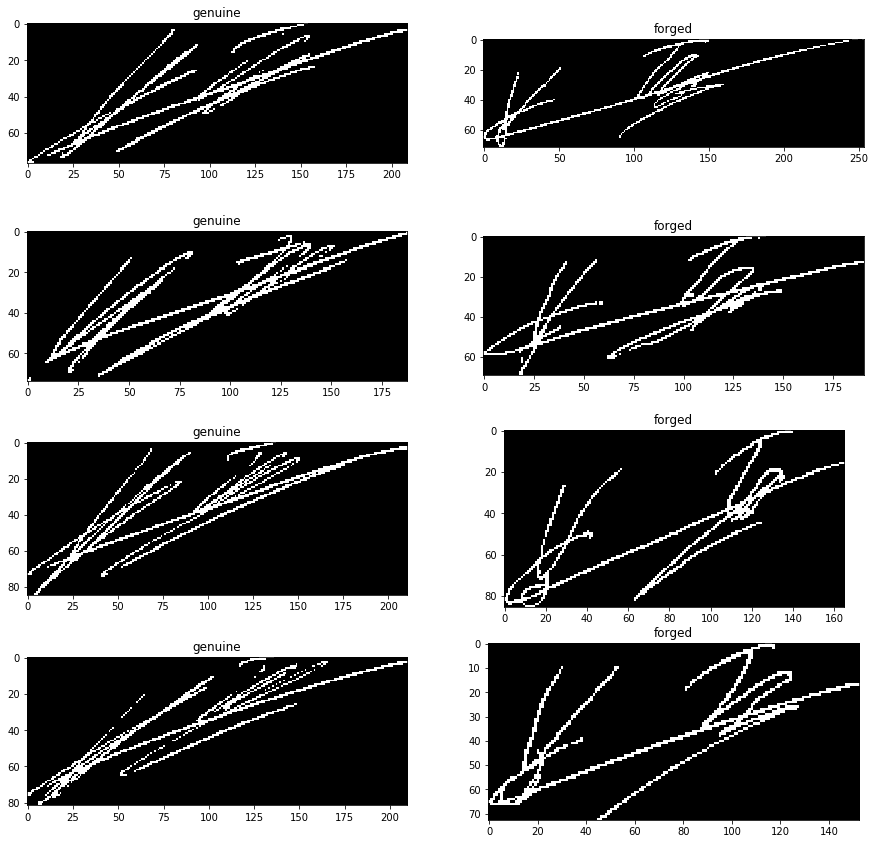

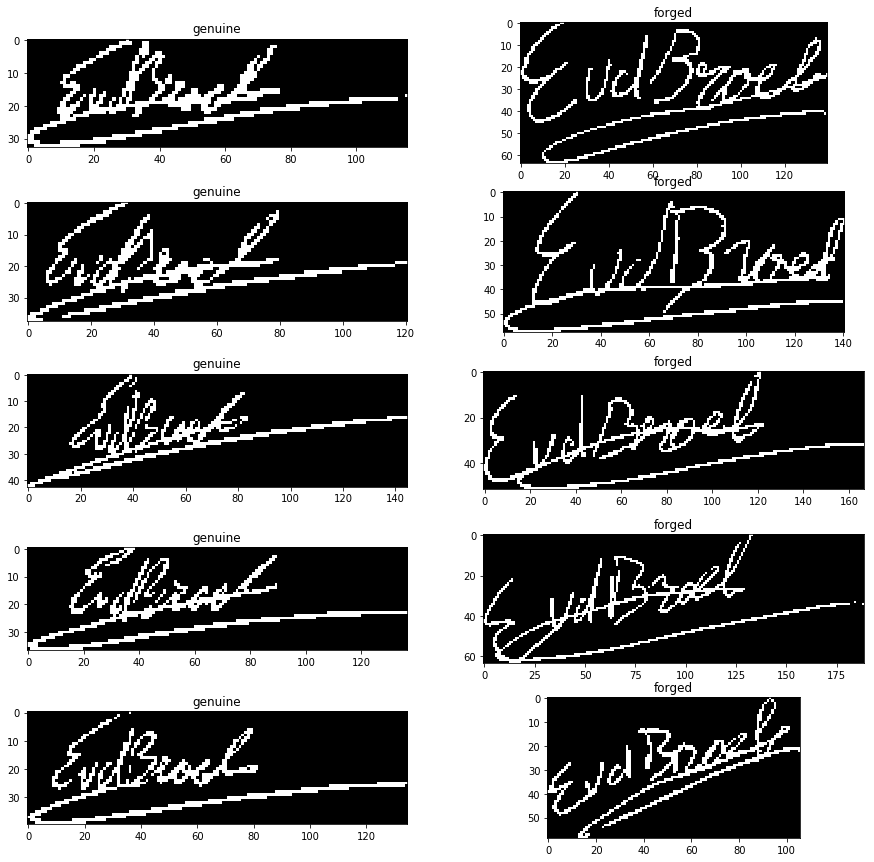

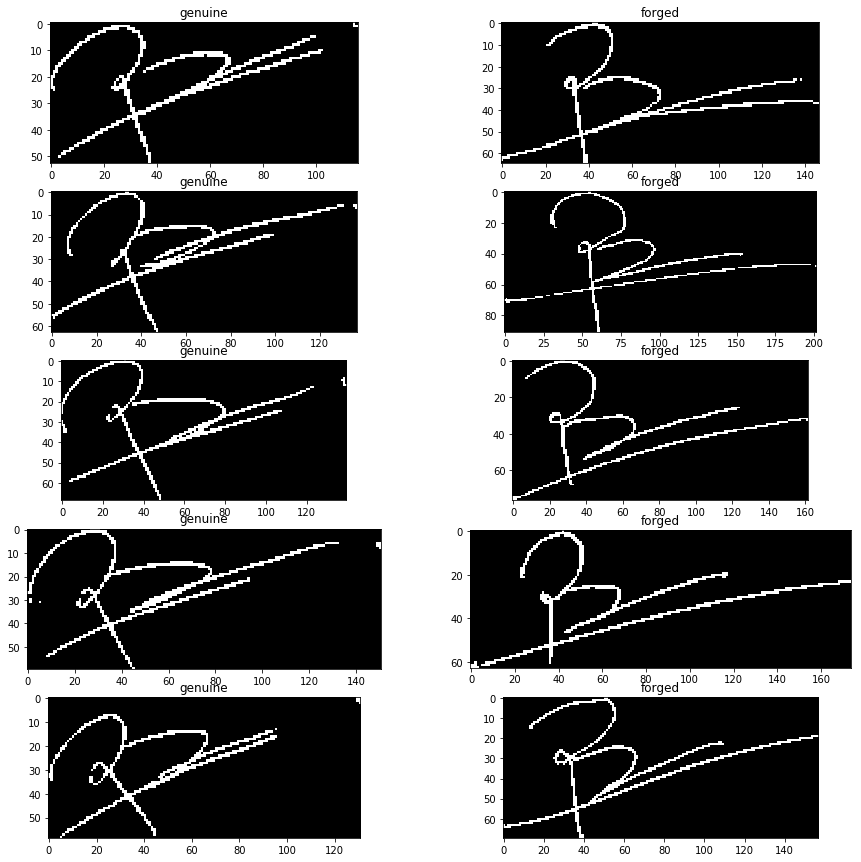

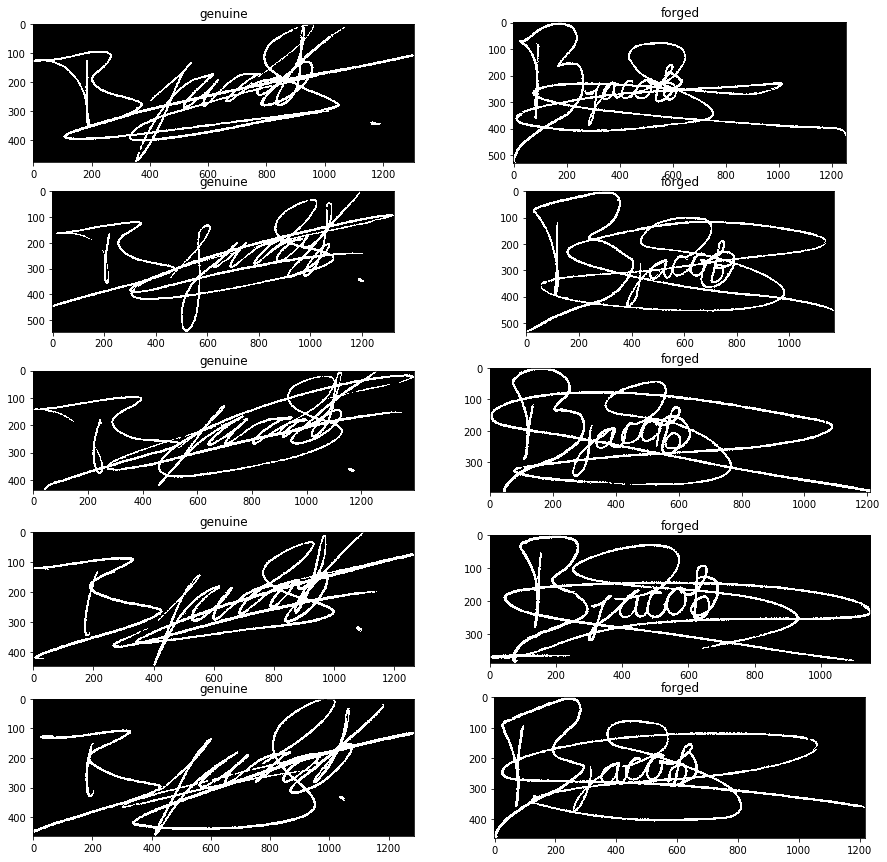

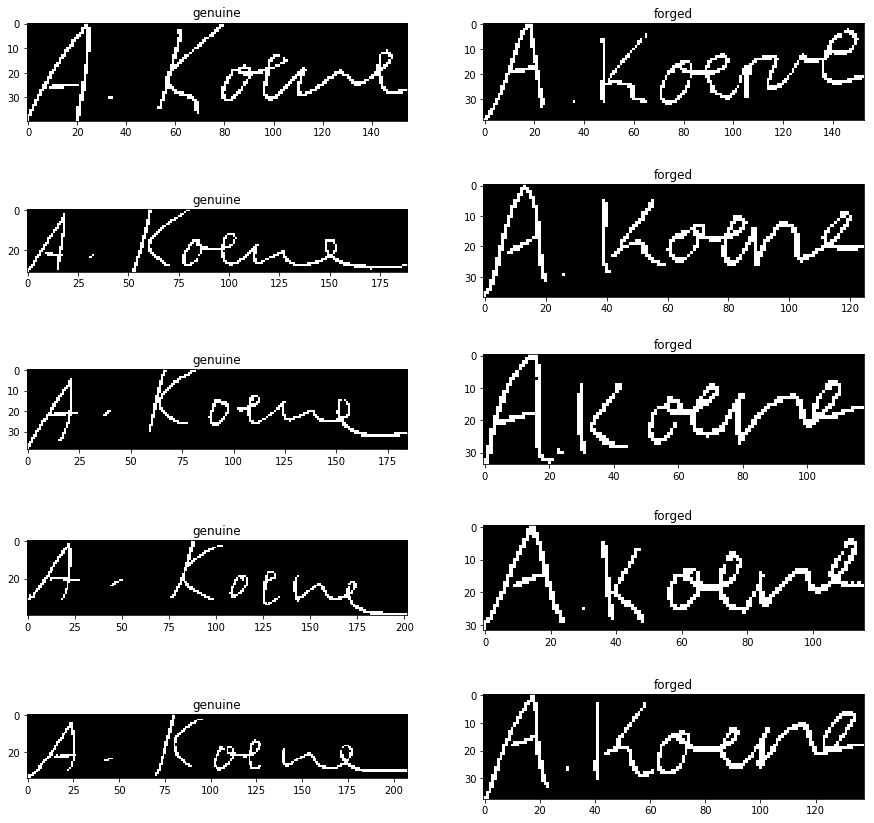

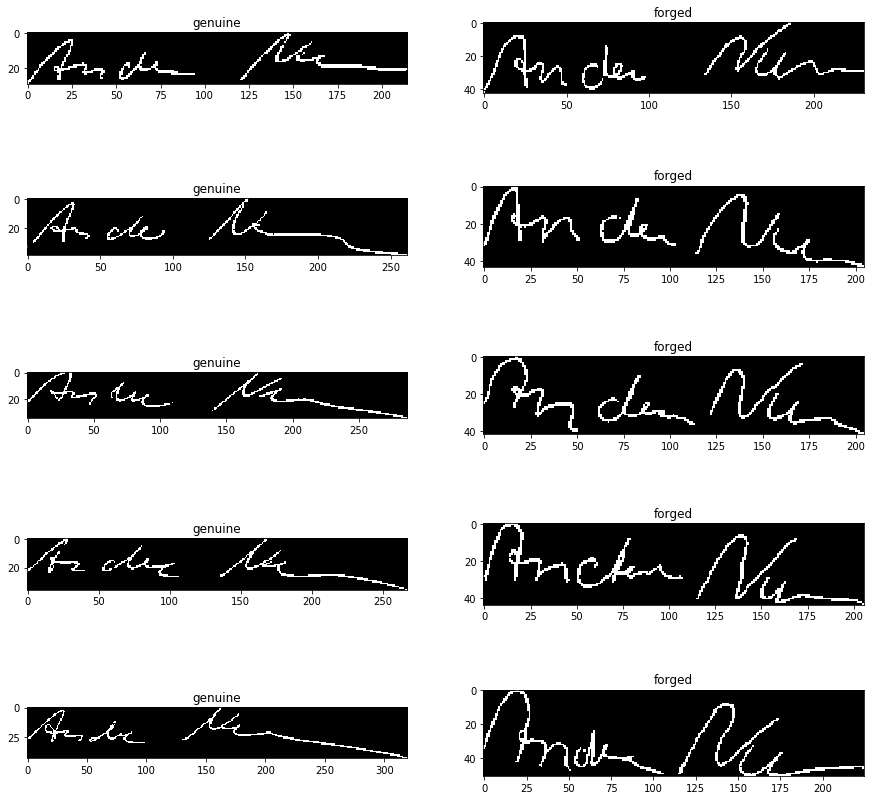

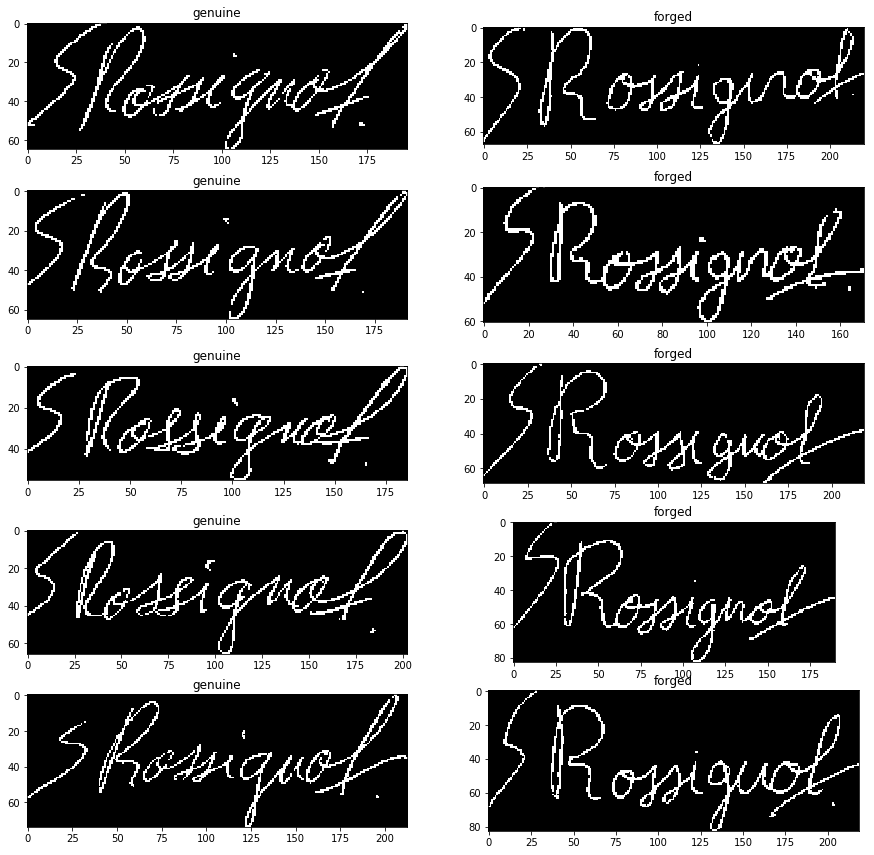

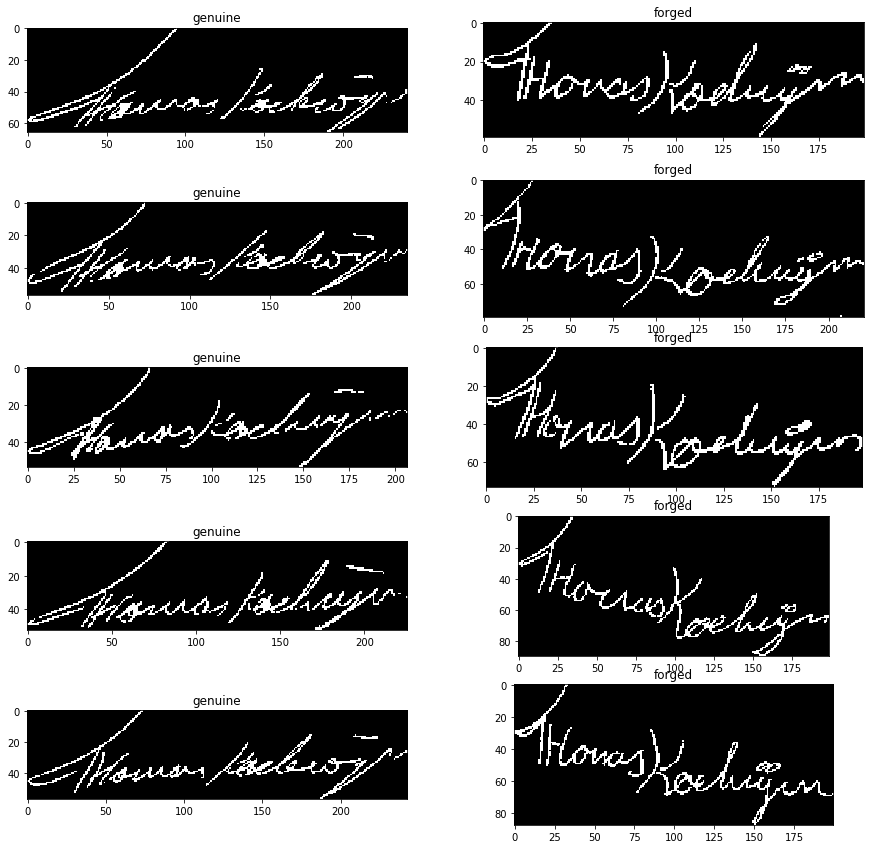

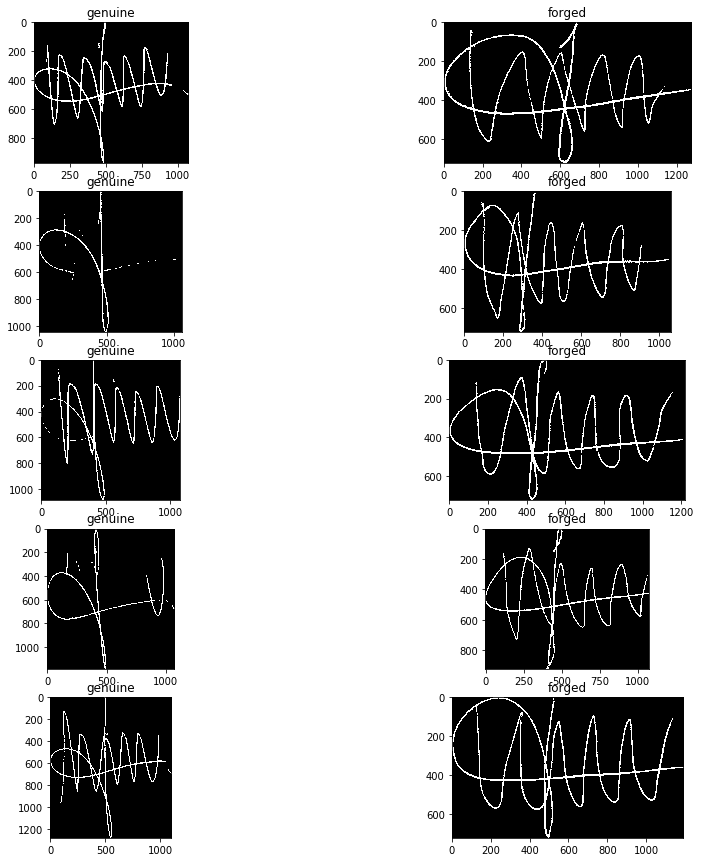

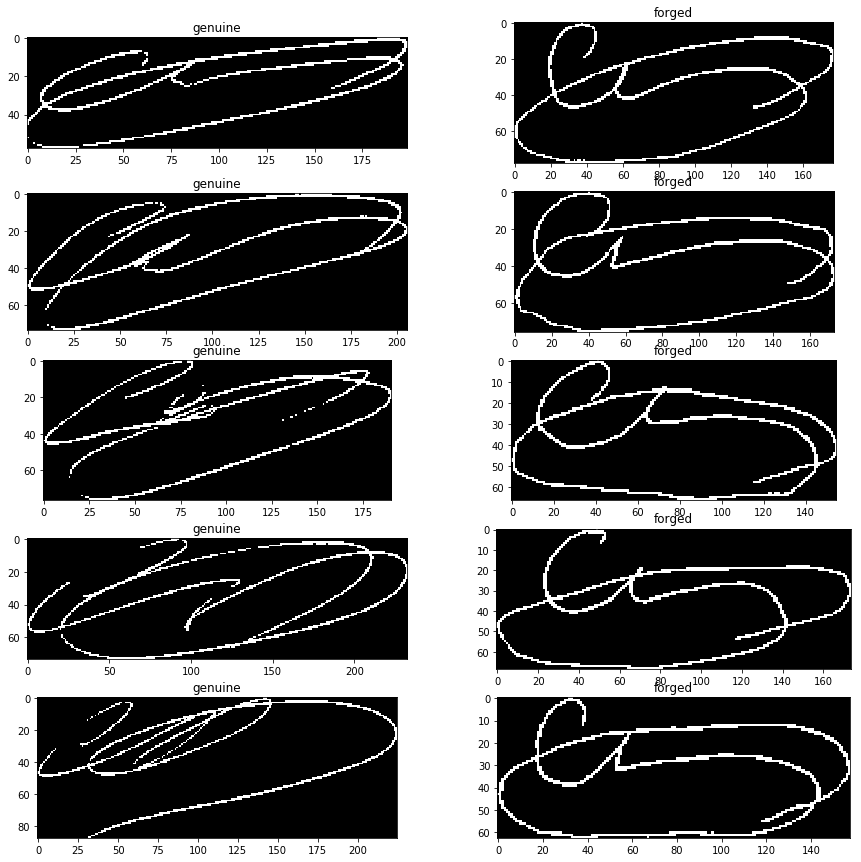

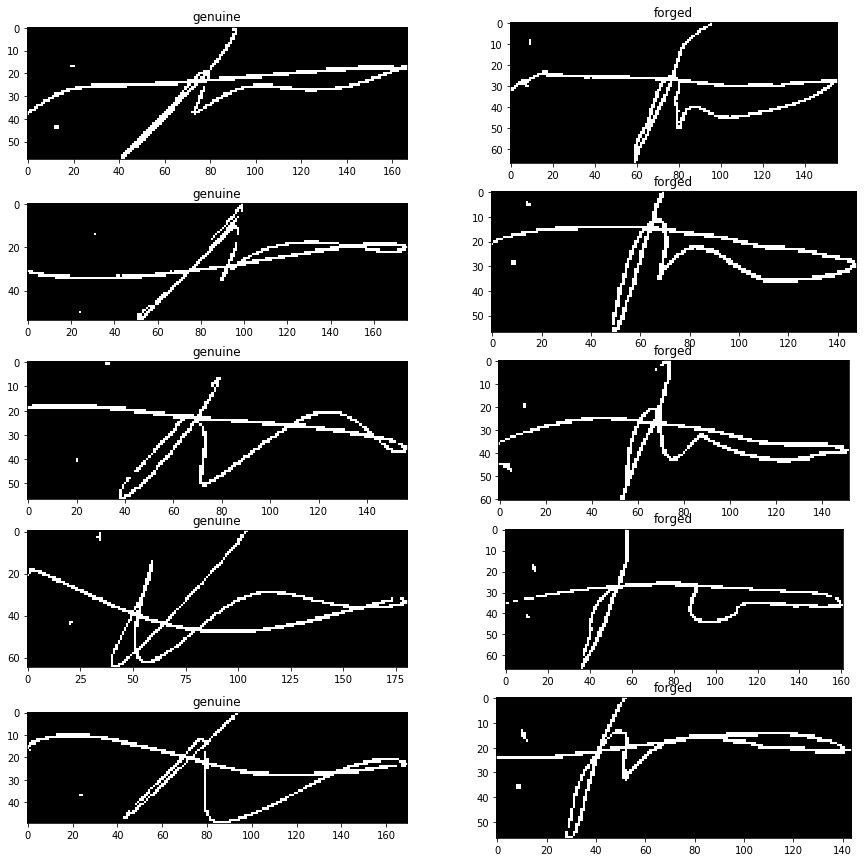

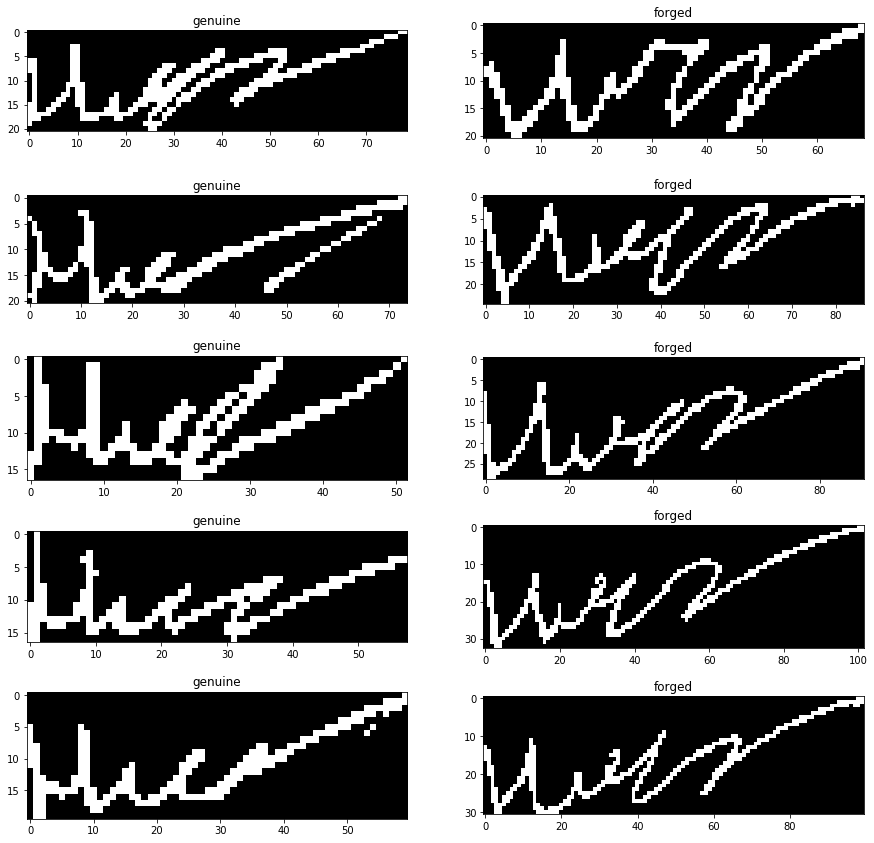

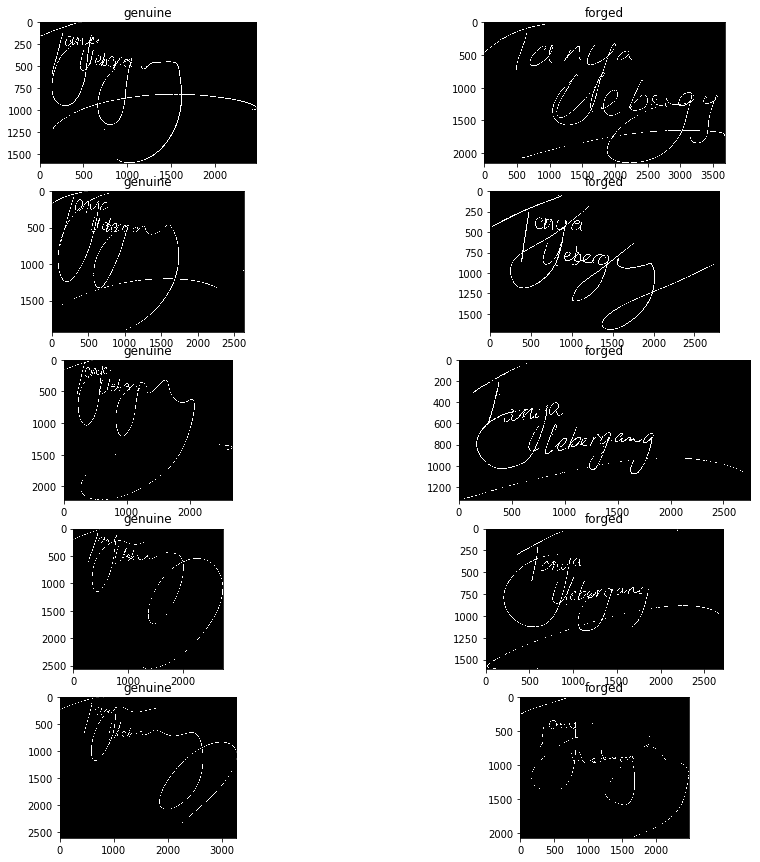

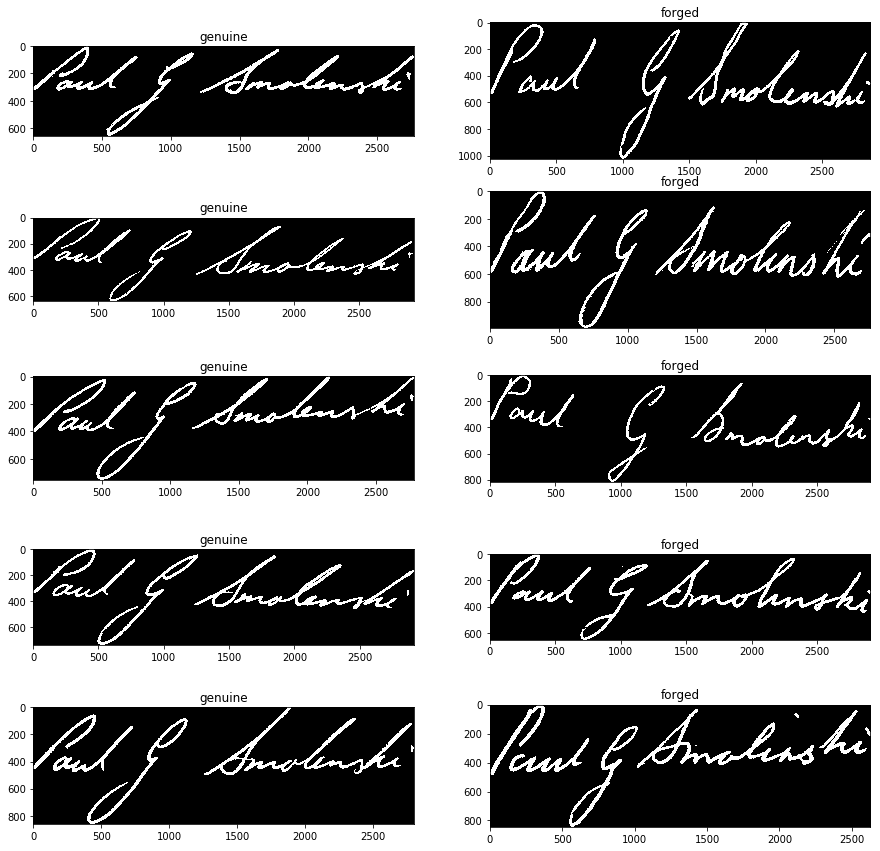

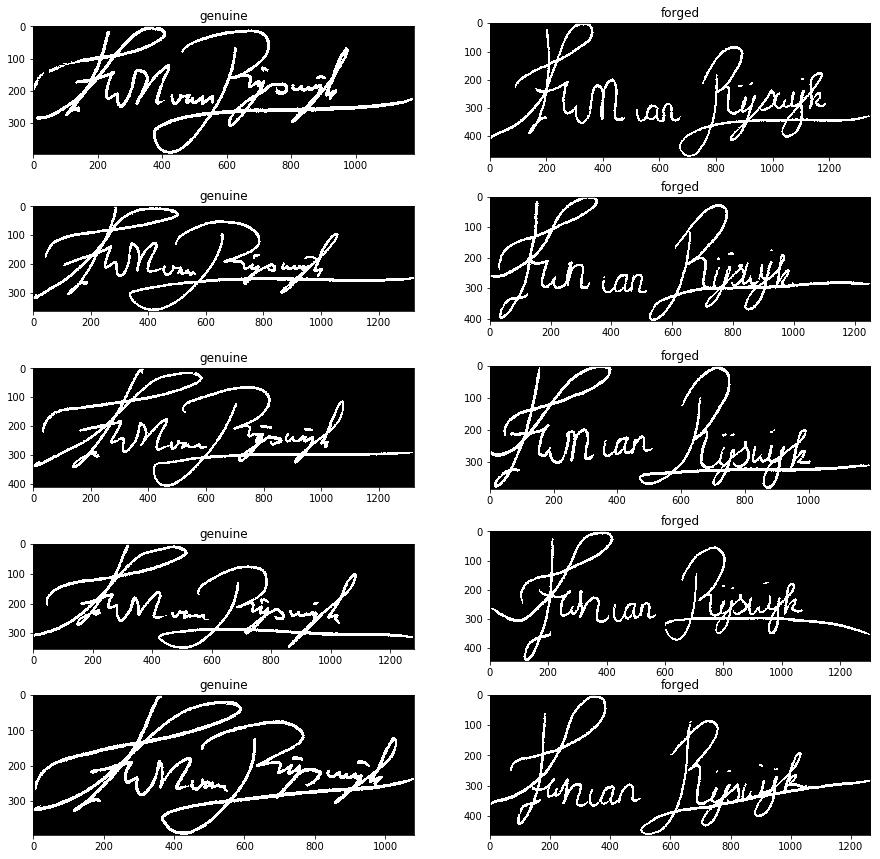

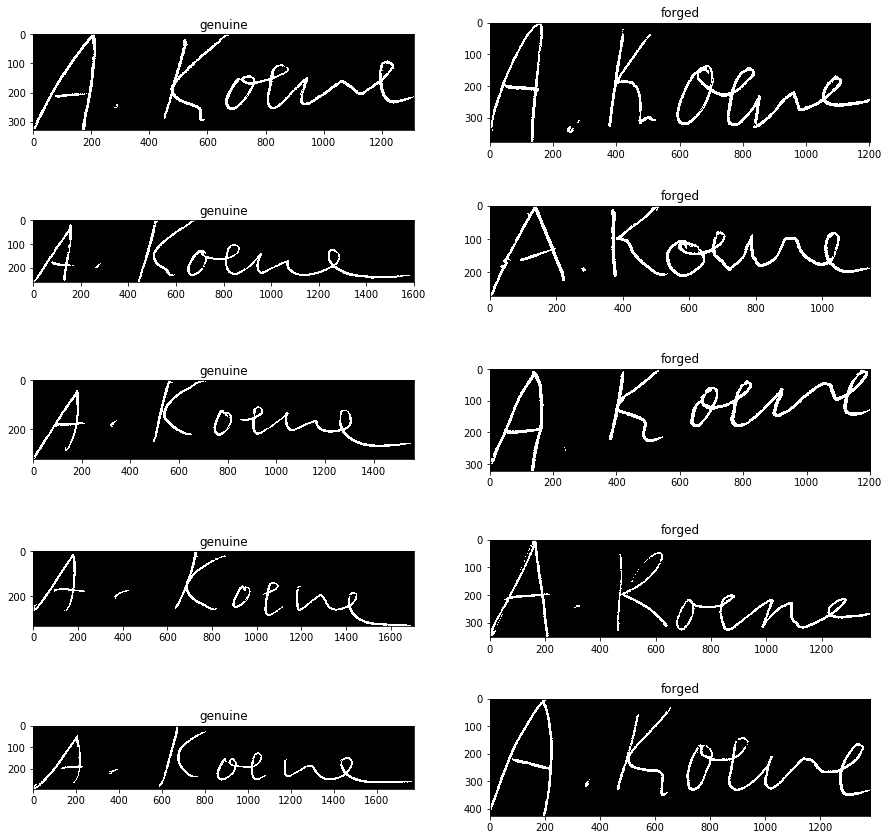

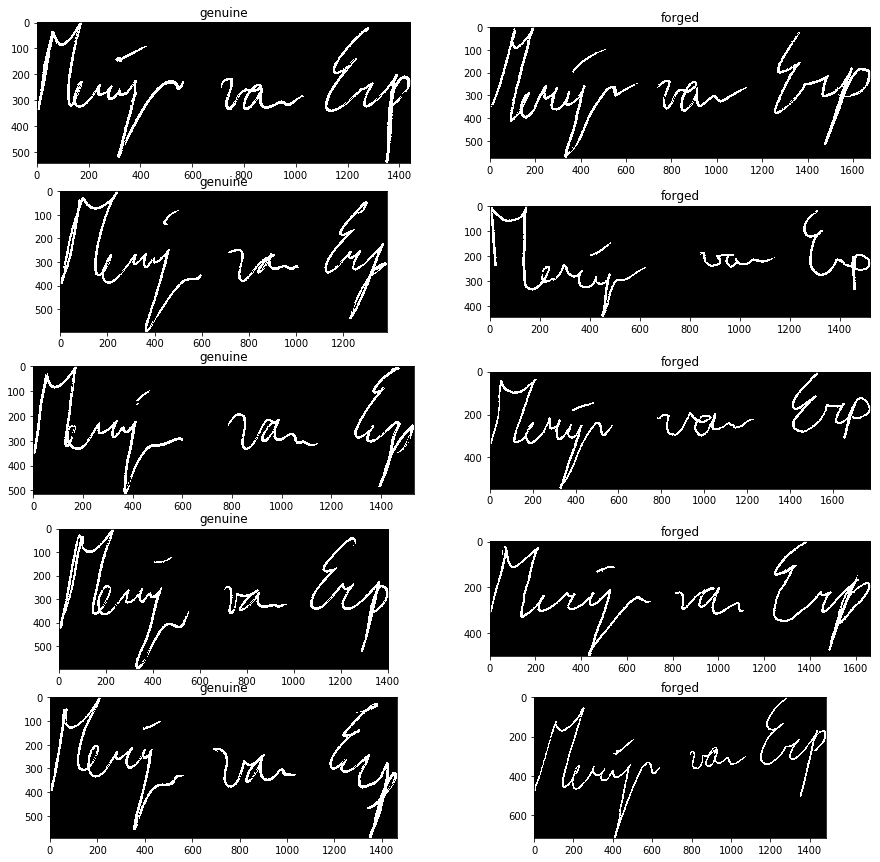

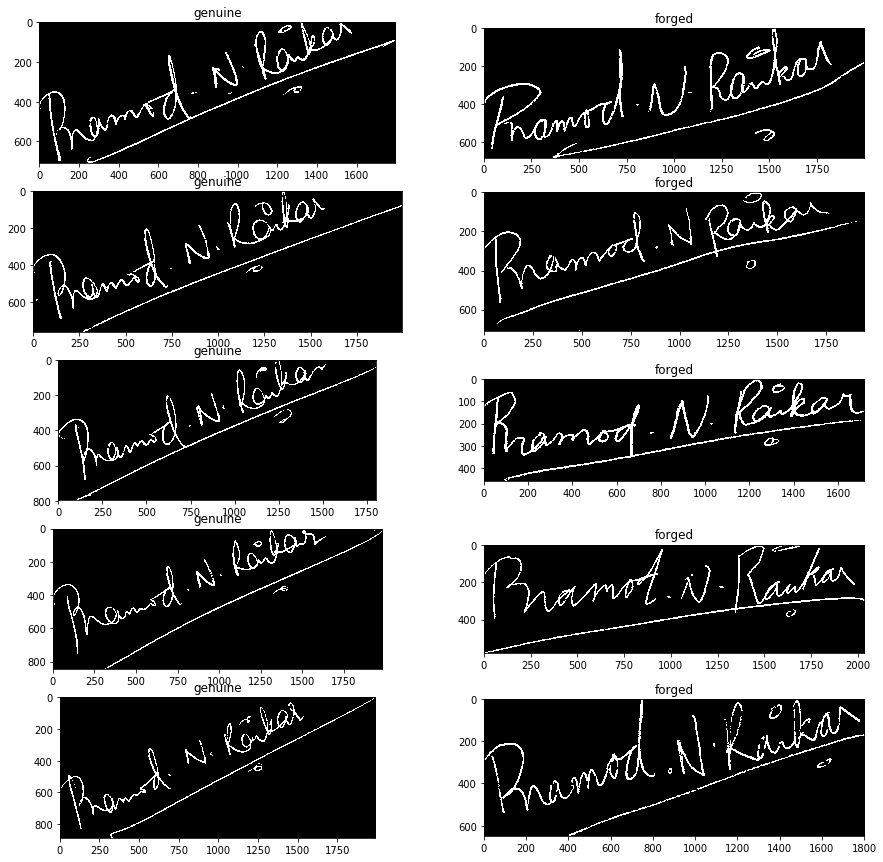

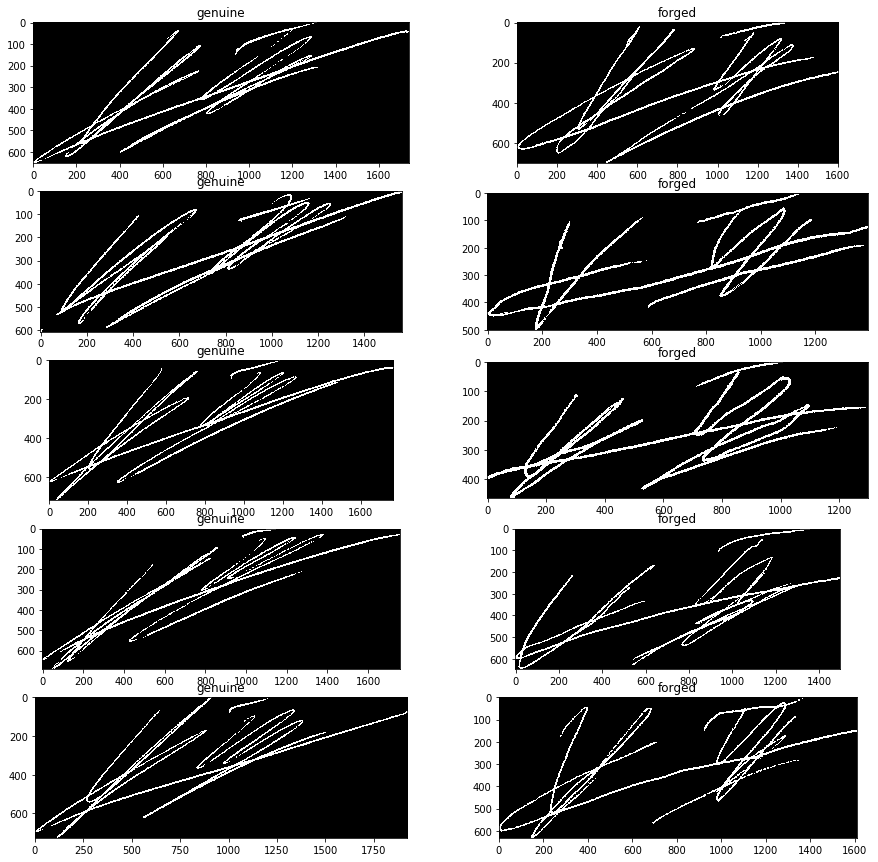

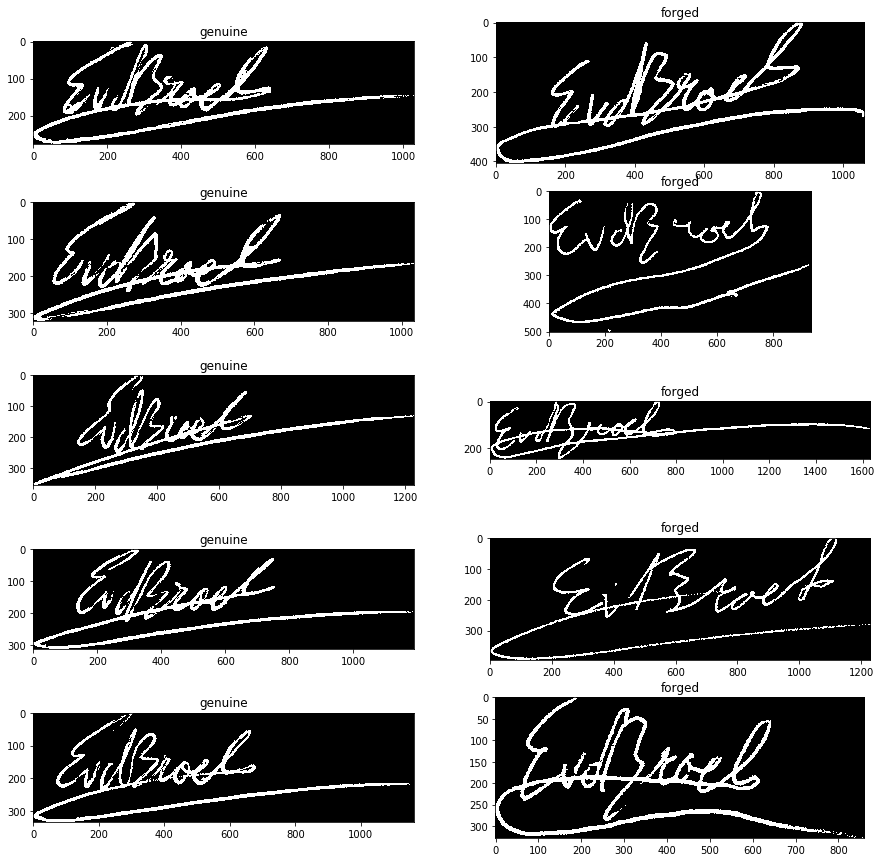

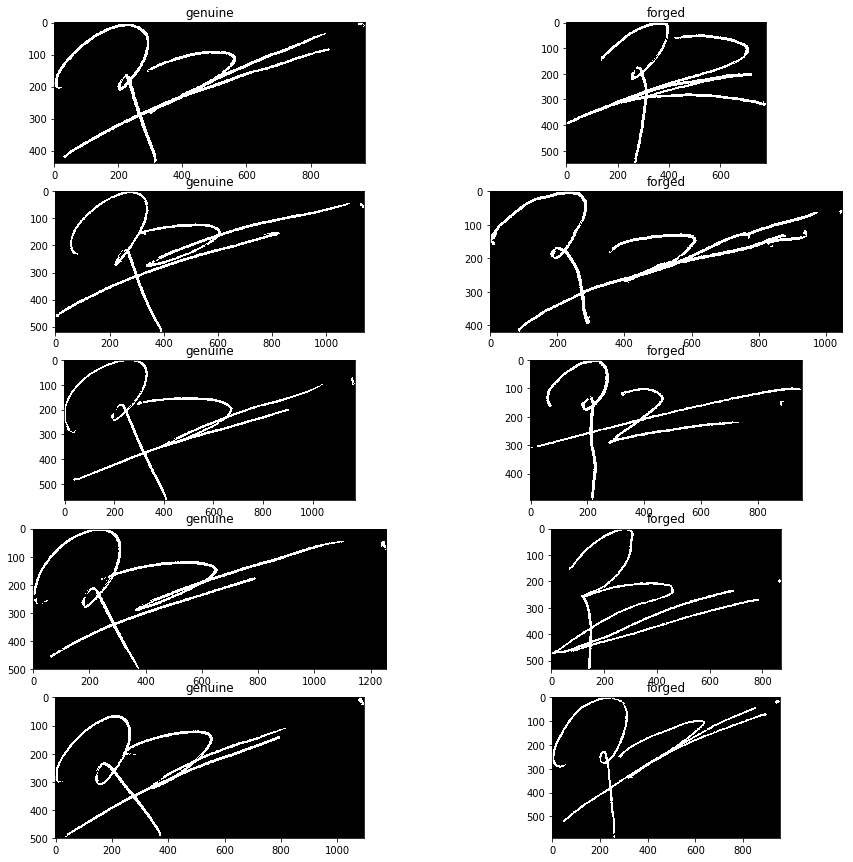

In [51]:
%matplotlib inline
  
for idx in sample_signatures_df.index:
       
    genuine_signatures = sample_signatures_df.loc[ idx, 'GenuineSignature'].split(',')
    forged_signatures = sample_signatures_df.loc[ idx, 'ForgedSignature'].split(',')
    
    size = min( len(genuine_signatures), len(forged_signatures) )
    f, axarr = plt.subplots( nrows = size, ncols = 2, figsize=(15,15))
        
    for j in range( size ):
        
        sample_i = processing_image( genuine_signatures_path + genuine_signatures[j] ) 
        sample_j = processing_image( forged_signatures_path + forged_signatures[j] )

        axarr[j, 0].imshow(sample_i, cmap = plt.cm.binary_r )
        axarr[j, 0].title.set_text( 'genuine' )

        axarr[j, 1].imshow(sample_j, cmap = plt.cm.binary_r )
        axarr[j, 1].title.set_text( 'forged' )